# Task
Data Understanding and Preprocessing
Exploratory Data Analysis (EDA) is essential to understand the structure and characteristics of the dataset. Before performing EDA, the following preprocessing steps were undertaken:
•	Handling Missing Values: Some columns, such as STATUS and SYMBOL, had missing data. Since SYMBOL had all missing values, it was dropped from the dataset. The VALUE column, containing production values, was converted to a numerical format.
•	Outlier Detection: Box plots and scatter plots were used to identify and handle potential outliers in production values.


Here is all the data you need:
"32100122.csv"

Broad Task

I want to make a model that can predict the total value of the commodity by a specific location based on the past data.


## Data loading

### Subtask:
Load the dataset "32100122.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "32100122.csv" into a pandas DataFrame named `df`.



#### **Load Needed Libraries**

In [9]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,GRU,LSTM, Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
import  time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive





In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


#### **Overview**

* Read a CSV file (32100122.csv) into a Pandas DataFrame.
En* orces a specific data type (float64) for a column named ColumnName.
Use*  low_memory=False to ensure the CSV file is read efficiently in one go (especially useful for large files).
* Displays the first five rows of the DataFrame to confirm successful loading.
* Implements error handling for:
    * FileNotFoundError: If the file isn’t found in the current directory.
    * ParserError: If the file has formatting issues (e.g., invalid CSV structure).
    * Other Unexpected Errors: Captures anything else that goes wrong during execution.
* Ensures that df = None is set in case of any errors to prevent the program from accidentally trying to access an invalid DataFrame.


In [11]:
data = '/content/drive/MyDrive/projects/amrik/production/32100122.csv'
try:
    df = pd.read_csv(data)
    display(df.head())
except FileNotFoundError:
    print("Error: '32100122.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None


<ipython-input-11-2181c991bf18>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


,REF_DATE,GEO,DGUID,Commodity,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976-05,Canada,2016A000011124,"Grade A chickens, under 2 kilograms, total",Tonnes,288,units,0,v382912,1.1,1886.0,NaN,NaN,NaN,0
1,1976-05,Canada,2016A000011124,"Other chicken, under 2 kilograms, total",Tonnes,288,units,0,v383004,1.2,1207.0,NaN,NaN,NaN,0
2,1976-05,Canada,2016A000011124,"Grade A chickens, 2 kilograms and over, total",Tonnes,288,units,0,v383040,1.3,750.0,NaN,NaN,NaN,0
3,1976-05,Canada,2016A000011124,"Other chicken, 2 kilograms and over, total",Tonnes,288,units,0,v383048,1.4,1536.0,NaN,NaN,NaN,0
4,1976-05,Canada,2016A000011124,"Chicken further processed, total",Tonnes,288,units,0,v383056,1.5,3983.0,NaN,NaN,NaN,0


## Data exploration

### Subtask:
Explore the loaded data to understand its structure and identify potential issues.


**Reasoning**:
We need to examine the shape of the DataFrame, get an overview of data types and missing values using `.info()`, calculate the percentage of missing values in each column, and display these findings.



#### **Overview**

* DataFrame type — Confirms the type (e.g., <class 'pandas.core.frame.DataFrame'>).
* Number of entries (rows) — Displays the total number of rows.
* Index Range — Shows the index range (e.g., RangeIndex: 100 entries, 0 to 99).
* Column Names — Lists all the column names in the DataFrame.
* Non-null Counts — Shows how many non-null (non-empty) values are in each column.
* Data Types — Displays the data type of each column (e.g., int64, float64, object, datetime64).
* Memory Usage — Indicates the total memory consumption of the DataFrame.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103964 entries, 0 to 103963
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   REF_DATE       103964 non-null  object 
 1   GEO            103964 non-null  object 
 2   DGUID          103964 non-null  object 
 3   Commodity      103964 non-null  object 
 4   UOM            103964 non-null  object 
 5   UOM_ID         103964 non-null  int64  
 6   SCALAR_FACTOR  103964 non-null  object 
 7   SCALAR_ID      103964 non-null  int64  
 8   VECTOR         103964 non-null  object 
 9   COORDINATE     103964 non-null  float64
 10  VALUE          103940 non-null  float64
 11  STATUS         24 non-null      object 
 12  SYMBOL         0 non-null       float64
 13  TERMINATED     0 non-null       float64
 14  DECIMALS       103964 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 11.9+ MB


#### **Overview**
* .isnull()  Identifies missing values in the DataFrame.
    * Each cell is marked as:
        * True - Missing value (NaN)
        * False →-Non-missing value
* .sum() - Counts the number of True values (i.e., missing values) in each column.

In [13]:
print(df.isnull().sum())

REF_DATE              0
GEO                   0
DGUID                 0
Commodity             0
UOM                   0
UOM_ID                0
SCALAR_FACTOR         0
SCALAR_ID             0
VECTOR                0
COORDINATE            0
VALUE                24
STATUS           103940
SYMBOL           103964
TERMINATED       103964
DECIMALS              0
dtype: int64


#### **Overview**
Generate summary statistics for our DataFrame, helping to understand the key characteristics of our data.

In [14]:
df.describe(include='all')

,REF_DATE,GEO,DGUID,Commodity,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
count,103964,103964,103964,103964,103964,103964.0,103964,103964.0,103964,103964.000000,103940.000000,24,0.0,0.0,103964.0
unique,573,12,12,22,1,NaN,1,NaN,184,NaN,NaN,1,NaN,NaN,NaN
top,2024-01,Canada,2016A000011124,"Turkeys, total",Tonnes,NaN,units,NaN,v382912,NaN,NaN,..,NaN,NaN,NaN
freq,184,12474,12474,6676,103964,NaN,103964,NaN,573,NaN,NaN,24,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,288.0,NaN,0.0,NaN,7.675891,2076.577814,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3.761760,6627.431546,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,288.0,NaN,0.0,NaN,1.100000,0.000000,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,NaN,288.0,NaN,0.0,NaN,4.150000,43.000000,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,NaN,288.0,NaN,0.0,NaN,8.600000,239.000000,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,NaN,288.0,NaN,0.0,NaN,10.800000,1108.000000,NaN,NaN,NaN,0.0


#### **Overview**
Count the frequency of unique values in a given column. Particularly useful for understanding the distribution of our categorical data.

**Parameters**
* normalize=False - (Default) Returns counts. Set to True to return proportions instead.
* sort=True - (Default) Sorts values in descending order of frequency. Set False to keep the original order.
* ascending=False  - (Default) Displays counts from highest to lowest. Set True for ascending order.
* dropna=True - (Default) Excludes missing values (NaN). Set False to include them

In [15]:
df['Commodity'].value_counts()


,count
Commodity,
"Turkeys, total",6676
"Chickens, total",6312
"Grade A chickens, 2 kilograms and over, total",4584
"Other chicken, 2 kilograms and over, total",4584
"Grade A chickens, under 2 kilograms, total",4584
"Other chicken, under 2 kilograms, total",4584
"Reported Grade A fowl, total",4584
"Chicken further processed, total",4584
"Other fowl, total",4584


#### **Overview**
Count the number of unique values in each column of a DataFrame.

## **Key Differences Between `.nunique()` and `.unique()` in Pandas**

| Feature             | `.nunique()`                              | `.unique()`                                 |
|---------------------|--------------------------------------------|------------------------------------------------|
| **Purpose**           | Counts the number of unique values.         | Lists the actual unique values.                 |
| **Output Type**       | Returns an **integer**.                     | Returns an **array (or list-like structure)**. |
| **Speed**             | **Faster** for counting unique values in large datasets. | **Slightly slower** for large datasets since it lists each value. |
| **Memory Efficient**  | Requires **less memory** as it only computes a count. | Uses **more memory** if there are many unique values. |
| **Best Use Case**     | When you only need the **count** of distinct values. | When you need to **see** the actual unique values. |
| **`dropna` Support**  | Supports `dropna=True/False` to include/exclude `NaN` values. | **Includes `NaN` values automatically** — no parameter to exclude them. |

---

In [16]:
df.nunique()

,0
REF_DATE,573
GEO,12
DGUID,12
Commodity,22
UOM,1
UOM_ID,1
SCALAR_FACTOR,1
SCALAR_ID,1
VECTOR,184
COORDINATE,168


#### **Overview**
 Randomly sample rows from our DataFrame.

In [17]:
df.sample(10)


,REF_DATE,GEO,DGUID,Commodity,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
63884,2005-12,Atlantic provinces,2016A00011,"Other turkey, over 5 kilograms but not more th...",Tonnes,288,units,0,v382929,2.11,56.0,NaN,NaN,NaN,0
96495,2020-09,Ontario,2016A000235,"Other chicken, under 2 kilograms, total",Tonnes,288,units,0,v383007,8.20,26.0,NaN,NaN,NaN,0
72853,2009-12,British Columbia,2016A000259,"Grade A turkeys, 5 kilograms and under, total",Tonnes,288,units,0,v383087,12.80,154.0,NaN,NaN,NaN,0
88258,2016-12,Saskatchewan,2016A000247,"Grade A chickens, under 2 kilograms, total",Tonnes,288,units,0,v382917,10.10,7.0,NaN,NaN,NaN,0
15528,1984-01,Quebec,2016A000224,"Geese, total",Tonnes,288,units,0,v382982,7.17,23.0,NaN,NaN,NaN,0
14539,1983-07,British Columbia,2016A000259,"Chickens, total",Tonnes,288,units,0,v383039,12.22,1079.0,NaN,NaN,NaN,0
17789,1985-01,Saskatchewan,2016A000247,"Other chicken, 2 kilograms and over, total",Tonnes,288,units,0,v383053,10.40,47.0,NaN,NaN,NaN,0
62659,2005-05,Ontario,2016A000235,"Chickens, total",Tonnes,288,units,0,v383035,8.22,14421.0,NaN,NaN,NaN,0
12014,1982-06,Atlantic provinces,2016A00011,"Chickens, total",Tonnes,288,units,0,v383029,2.22,587.0,NaN,NaN,NaN,0
86423,2016-02,Saskatchewan,2016A000247,"Reported Grade A fowl, total",Tonnes,288,units,0,v383069,10.60,0.0,NaN,NaN,NaN,0


#### **Overview**
**Change the REF_DATE column to a date time**
* Ensures REF_DATE is interpreted as a date rather than a plain string.
* Assumes the first day of the month for consistency in date representation.
* Improves compatibility with time-series analysis tools in Pandas.

**Key Outcome**
The REF_DATE column will now be a datetime object, formatted as 'YYYY-MM-DD' with the first day of the month automatically added.

Show both the data and column headers for easy inspection.

In [18]:
# Convert REF_DATE to datetime (assuming first day of the month)
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')

print(df)


         REF_DATE               GEO           DGUID  \
0      1976-05-01            Canada  2016A000011124   
1      1976-05-01            Canada  2016A000011124   
2      1976-05-01            Canada  2016A000011124   
3      1976-05-01            Canada  2016A000011124   
4      1976-05-01            Canada  2016A000011124   
...           ...               ...             ...   
103959 2024-01-01  British Columbia     2016A000259   
103960 2024-01-01  British Columbia     2016A000259   
103961 2024-01-01  British Columbia     2016A000259   
103962 2024-01-01  British Columbia     2016A000259   
103963 2024-01-01  British Columbia     2016A000259   

                                            Commodity     UOM  UOM_ID  \
0          Grade A chickens, under 2 kilograms, total  Tonnes     288   
1             Other chicken, under 2 kilograms, total  Tonnes     288   
2       Grade A chickens, 2 kilograms and over, total  Tonnes     288   
3          Other chicken, 2 kilograms and over,

#### **Overview**
* Display the data types of each column in the DataFrame.
* Useful for confirming that our data is in the correct format for analysis or manipulation.


In [19]:
df.dtypes


,0
REF_DATE,datetime64[ns]
GEO,object
DGUID,object
Commodity,object
UOM,object
UOM_ID,int64
SCALAR_FACTOR,object
SCALAR_ID,int64
VECTOR,object
COORDINATE,float64


#### **Overview**
Visualize missing values in our DataFrame using Seaborn's heatmap() function, making it easy to spot gaps in our data.



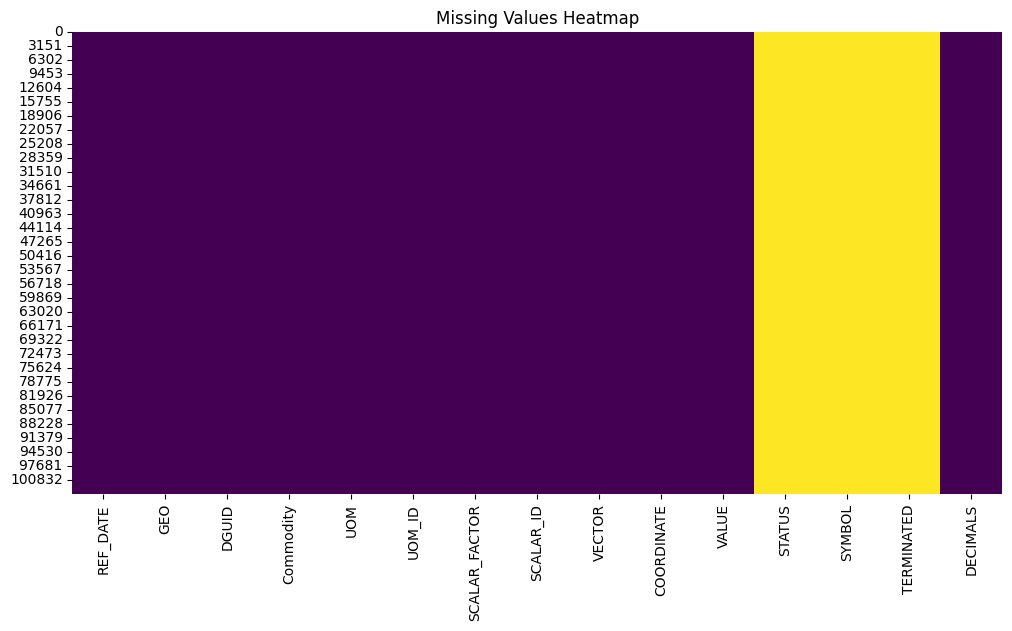

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


#### **Overview**
Ggenerate histograms for all numerical features in the DataFrame, making it easy to inspect their distributions.



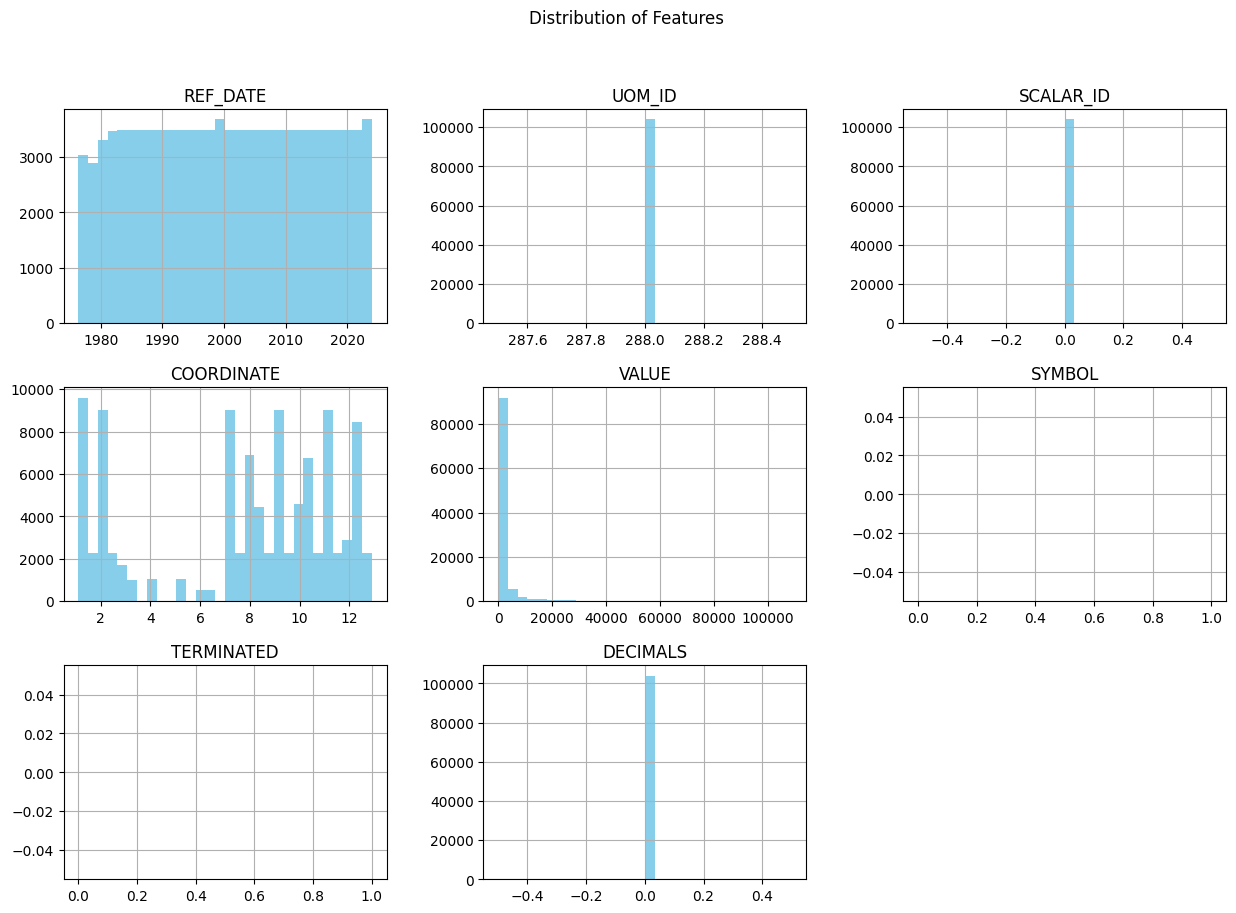

In [21]:
df.hist(figsize=(15, 10), bins=30, color='skyblue')
plt.suptitle('Distribution of Features')
plt.show()


## Data cleaning

### Subtasks:
1. Removing columns with number of null enteries  more than the threshold value
2. Removing columns with only 1 unique value
3. Filtering columns that have no extra information about the data.
4. Imputing the null values in the remaining columns

**Reasoning**:

1. Excluding columns with null entries exceeding a predefined threshold

In data preprocessing, handling missing values is crucial to ensuring the quality of the dataset. One common strategy is to remove columns with a high percentage of missing data. By setting a predefined threshold, columns that contain null values beyond this threshold are excluded from the dataset. This helps reduce noise and prevents models from being skewed by features that lack sufficient data. For example, if a column has more than 30% missing values, it might not provide enough reliable information, so it’s typically removed to enhance model accuracy and performance.

2. Excluding columns with a single unique value

Columns that contain only one unique value throughout the dataset are often redundant and provide no meaningful variation for analysis. These columns are essentially constant and do not offer any information that can help distinguish patterns or relationships within the data. For instance, a column labeled "Gender" where every entry is "Female" is not helpful in predictive modeling or data analysis. Removing such columns reduces the dimensionality of the dataset and improves the efficiency of the model training process by focusing on variables that contribute more informative diversity.

3. Filtering out columns that do not contribute additional information to the dataset

In many datasets, there may be columns that do not provide any added value in terms of distinguishing patterns or enhancing predictive power. These are often columns that either have minimal variation or are too highly correlated with other variables. By filtering out such columns, you ensure that the model focuses only on the features that have the potential to add new insights. This step helps reduce the noise and complexity in the dataset, making it more manageable for analysis and improving the efficiency of any machine learning algorithms applied.

4. Imputing the null values in the remaining columns

After removing columns with excessive missing data, the next step is to handle the remaining missing values in the dataset. Imputation is a common technique used to fill in these gaps. Rather than discarding rows with missing values, imputing replaces them with estimated values based on the rest of the data. There are various imputation strategies, such as replacing null values with the mean, median, or mode of the column, or using more advanced methods like regression imputation or k-nearest neighbors. The goal of imputing missing values is to maintain the integrity of the dataset while ensuring that the model has enough complete data for accurate predictions and analyses. Proper imputation helps to prevent data loss and ensures that the remaining features can still contribute valuable information.



#### **Overview**
Identify and remove columns in the DataFrame (df) that have more than 80% missing values.

In [22]:
threshold=0.8
dropped_columns=[]
for column in df.columns:
  missing_percentage=df[column].isnull().sum()/len(df)
  if missing_percentage>threshold:
    dropped_columns.append(column)
    df=df.drop(column,axis=1)

print('These columns have been dropped as these contained more than 80% of values as Null')
print(dropped_columns)


These columns have been dropped as these contained more than 80% of values as Null
['STATUS', 'SYMBOL', 'TERMINATED']


#### **Overview**
 Inspect the contents and structure of our DataFrame.

In [23]:
display(df.head())
display(df.info())


,REF_DATE,GEO,DGUID,Commodity,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,1976-05-01,Canada,2016A000011124,"Grade A chickens, under 2 kilograms, total",Tonnes,288,units,0,v382912,1.1,1886.0,0
1,1976-05-01,Canada,2016A000011124,"Other chicken, under 2 kilograms, total",Tonnes,288,units,0,v383004,1.2,1207.0,0
2,1976-05-01,Canada,2016A000011124,"Grade A chickens, 2 kilograms and over, total",Tonnes,288,units,0,v383040,1.3,750.0,0
3,1976-05-01,Canada,2016A000011124,"Other chicken, 2 kilograms and over, total",Tonnes,288,units,0,v383048,1.4,1536.0,0
4,1976-05-01,Canada,2016A000011124,"Chicken further processed, total",Tonnes,288,units,0,v383056,1.5,3983.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103964 entries, 0 to 103963
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   REF_DATE       103964 non-null  datetime64[ns]
 1   GEO            103964 non-null  object        
 2   DGUID          103964 non-null  object        
 3   Commodity      103964 non-null  object        
 4   UOM            103964 non-null  object        
 5   UOM_ID         103964 non-null  int64         
 6   SCALAR_FACTOR  103964 non-null  object        
 7   SCALAR_ID      103964 non-null  int64         
 8   VECTOR         103964 non-null  object        
 9   COORDINATE     103964 non-null  float64       
 10  VALUE          103940 non-null  float64       
 11  DECIMALS       103964 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 9.5+ MB


None

#### **Overview**
* Efficiently count the number of unique values in each column of the DataFrame and print the results in a clean, readable format.

## **Key Differences Between `.nunique()` and `.unique()` in Pandas**
| Feature             | `.nunique()`                              | `.unique()`                                 |
|---------------------|--------------------------------------------|------------------------------------------------|
| **Purpose**           | Counts the number of unique values.         | Lists the actual unique values.                 |
| **Output Type**       | Returns an **integer**.                     | Returns an **array (or list-like structure)**. |
| **Speed**             | **Faster** for counting unique values in large datasets. | **Slightly slower** for large datasets since it lists each value. |
| **Memory Efficient**  | Requires **less memory** as it only computes a count. | Uses **more memory** if there are many unique values. |
| **Best Use Case**     | When you only need the **count** of distinct values. | When you need to **see** the actual unique values. |
| **`dropna` Support**  | Supports `dropna=True/False` to include/exclude `NaN` values. | **Includes `NaN` values automatically** — no parameter to exclude them. |

---

In [24]:
# Code for Counting Unique Values in Each Column
column_unique = [(col, df[col].nunique()) for col in df.columns]

# Display neatly
for col, unique_count in column_unique:
    print(f"{col}: {unique_count} unique values")


REF_DATE: 573 unique values
GEO: 12 unique values
DGUID: 12 unique values
Commodity: 22 unique values
UOM: 1 unique values
UOM_ID: 1 unique values
SCALAR_FACTOR: 1 unique values
SCALAR_ID: 1 unique values
VECTOR: 184 unique values
COORDINATE: 168 unique values
VALUE: 12081 unique values
DECIMALS: 1 unique values


#### **Overview**
Efficiently sort the number of unique values for each column in the DataFrame and print the results in a clean, organized format.

In [25]:
column_unique_sorted = sorted(column_unique, key=lambda x: x[1], reverse=True)

# Display sorted unique value counts
for col, unique_count in column_unique_sorted:
    print(f"{col}: {unique_count} unique values")


VALUE: 12081 unique values
REF_DATE: 573 unique values
VECTOR: 184 unique values
COORDINATE: 168 unique values
Commodity: 22 unique values
GEO: 12 unique values
DGUID: 12 unique values
UOM: 1 unique values
UOM_ID: 1 unique values
SCALAR_FACTOR: 1 unique values
SCALAR_ID: 1 unique values
DECIMALS: 1 unique values


#### **Overview**
Visualize the number of unique values in each column using a horizontal bar chart with a logarithmic scale for better clarity on value distribution.

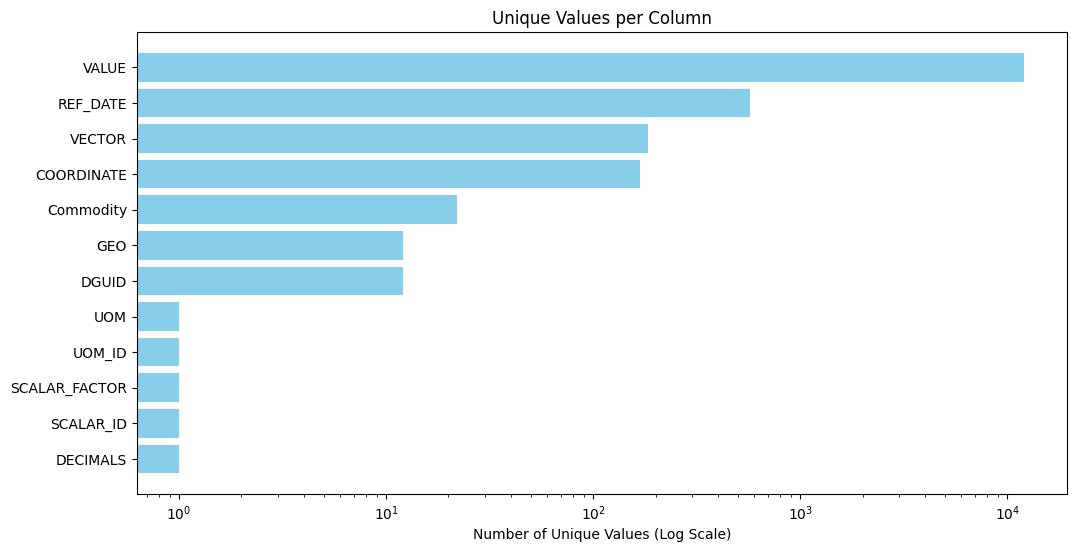

In [26]:
columns, unique_counts = zip(*column_unique_sorted)


plt.figure(figsize=(12, 6))
plt.barh(columns, unique_counts, color='skyblue')
plt.xscale('log')
plt.xlabel('Number of Unique Values (Log Scale)')
plt.title('Unique Values per Column')
plt.gca().invert_yaxis()  # Display largest at the top
plt.show()


#### **Overview**
Split columns into high-value (many unique values) and low-value (fewer unique values) groups and visualizes them using horizontal bar charts. Provides a clearer view of the data's complexity and diversity.



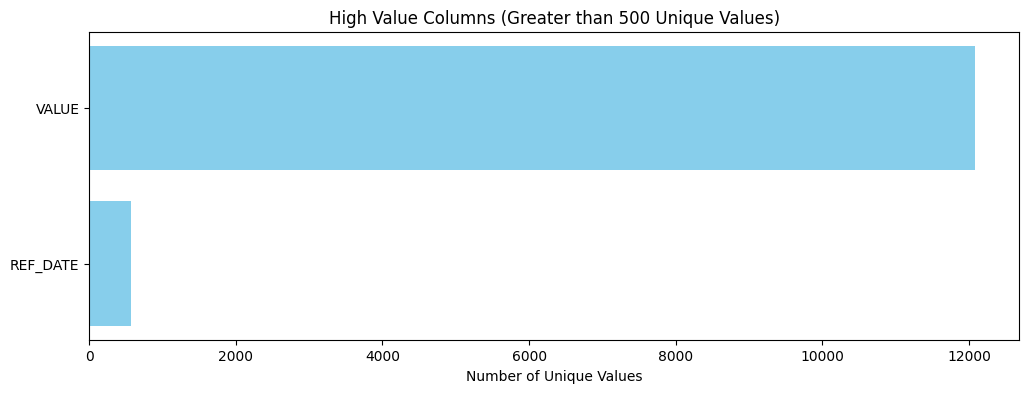

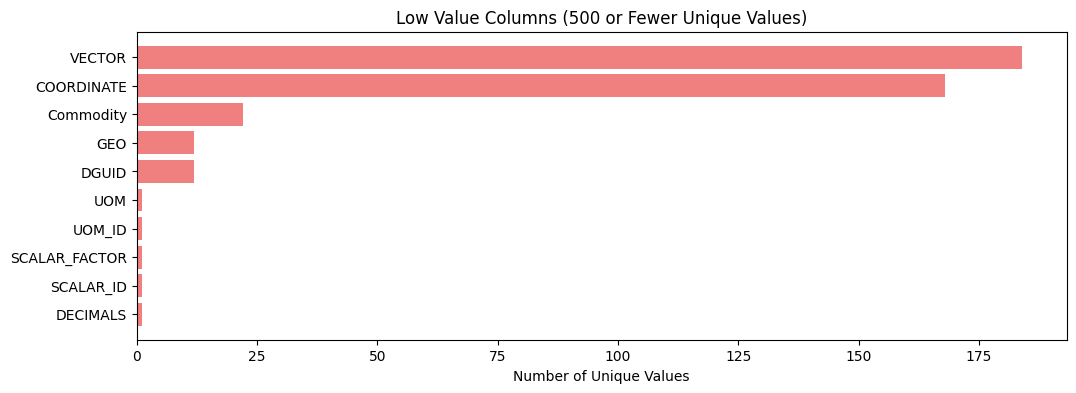

In [27]:
# High value columns
high_value_cols = [col for col, count in column_unique_sorted if count > 500]
high_value_counts = [count for col, count in column_unique_sorted if count > 500]

# Low value columns
low_value_cols = [col for col, count in column_unique_sorted if count <= 500]
low_value_counts = [count for col, count in column_unique_sorted if count <= 500]

# High Value Chart
plt.figure(figsize=(12, 4))
plt.barh(high_value_cols, high_value_counts, color='skyblue')
plt.xlabel('Number of Unique Values')
plt.title('High Value Columns (Greater than 500 Unique Values)')
plt.gca().invert_yaxis()
plt.show()

# Low Value Chart
plt.figure(figsize=(12, 4))
plt.barh(low_value_cols, low_value_counts, color='lightcoral')
plt.xlabel('Number of Unique Values')
plt.title('Low Value Columns (500 or Fewer Unique Values)')
plt.gca().invert_yaxis()
plt.show()


#### **Overview**
Identify and remove columns that contain only one unique value across all rows. These columns are often uninformative and provide no meaningful variance for analysis or modeling.

In [28]:
# Identify and drop columns with only one unique value
removed_columns = df.columns[df.nunique() == 1].tolist()

# Drop those columns
df.drop(columns=removed_columns, inplace=True)

print('These columns have been dropped as they contained only one unique value:')
print(removed_columns)


These columns have been dropped as they contained only one unique value:
['UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'DECIMALS']


In [29]:
df.head()

,REF_DATE,GEO,DGUID,Commodity,VECTOR,COORDINATE,VALUE
0,1976-05-01,Canada,2016A000011124,"Grade A chickens, under 2 kilograms, total",v382912,1.1,1886.0
1,1976-05-01,Canada,2016A000011124,"Other chicken, under 2 kilograms, total",v383004,1.2,1207.0
2,1976-05-01,Canada,2016A000011124,"Grade A chickens, 2 kilograms and over, total",v383040,1.3,750.0
3,1976-05-01,Canada,2016A000011124,"Other chicken, 2 kilograms and over, total",v383048,1.4,1536.0
4,1976-05-01,Canada,2016A000011124,"Chicken further processed, total",v383056,1.5,3983.0


In [30]:
display(df['GEO'].unique())

array(['Canada', 'Atlantic provinces', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia',
       'Prince Edward Island', 'Nova Scotia', 'New Brunswick',
       'Newfoundland and Labrador'], dtype=object)

#### **Overview**
* df['GEO'] - Selects the GEO column from the DataFrame.
* .unique() - Returns an array containing the distinct (unique) values in the GEO column.
* display() - Ensures the output is shown in a cleaner, tabular format

In [31]:
print('As the column DGUID and GEO have the same values and represents the same aspect of data we can remove one column')
df=df.drop('DGUID',axis=1)

As the column DGUID and GEO have the same values and represents the same aspect of data we can remove one column


#### **Overview**
Inspect our DataFrame’s contents and assess missing data.



In [32]:
display(df.head())
display(df.isnull().sum())


,REF_DATE,GEO,Commodity,VECTOR,COORDINATE,VALUE
0,1976-05-01,Canada,"Grade A chickens, under 2 kilograms, total",v382912,1.1,1886.0
1,1976-05-01,Canada,"Other chicken, under 2 kilograms, total",v383004,1.2,1207.0
2,1976-05-01,Canada,"Grade A chickens, 2 kilograms and over, total",v383040,1.3,750.0
3,1976-05-01,Canada,"Other chicken, 2 kilograms and over, total",v383048,1.4,1536.0
4,1976-05-01,Canada,"Chicken further processed, total",v383056,1.5,3983.0


,0
REF_DATE,0
GEO,0
Commodity,0
VECTOR,0
COORDINATE,0
VALUE,24


As now after the removal of non-neccesary columns we are left with one column value with 24 null values

To replace these values we can not use the normal methods of mean, mode as the data is a time dependent data and have differnt range for value at different time so to impute the value we will use the KNN imputation approach


## Data analysis

### Subtask:
1. Check the distribution of the data and trend on the basis of the location
2. Check the distribution of the data and trend on the basis of the Commodity


**Reasoning**:






1. Check the distribution of the data and trend on the basis of the location


To analyze the trend of total value or sales across different locations, you can use line charts to represent how the value sold in each location (e.g., Alberta, Ontario, Quebec, etc.) changes over time. For example, you can examine the total value or sales in each province at specific time intervals, such as monthly or yearly. By plotting the total value sold for each location on the Y-axis and the time period (e.g., months or years) on the X-axis, you can observe trends, fluctuations, and patterns in different provinces. You can also compare multiple locations on the same chart by using different lines for each region, allowing you to identify which provinces are showing increasing or decreasing sales trends and how regional performance varies over time. This approach provides valuable insights into regional differences and helps track the performance of different areas over time.

2. Check the distribution of the data and trend on the basis of the Commodity

To analyze the trend of total value or sales across different commodities, you can use line charts to represent how the value of each commodity changes over time. For example, you can examine the total value sold for different poultry commodities (e.g., Grade A chickens, turkeys, ducks, etc.) at specific time intervals. By plotting the total sales or quantities of each commodity on the Y-axis and the time period (e.g., months or years) on the X-axis, you can observe trends such as increases, decreases, or fluctuations in demand for specific commodities. You can also compare multiple commodities on the same chart, using different lines for each commodity, to identify patterns, seasonality, or shifts in consumer preferences over time. This approach helps uncover valuable insights about which commodities are performing better, which are trending upwards or downwards, and how they compare against each other across time.



In [33]:
display(df['GEO'].unique())

array(['Canada', 'Atlantic provinces', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia',
       'Prince Edward Island', 'Nova Scotia', 'New Brunswick',
       'Newfoundland and Labrador'], dtype=object)

In [34]:
display(df['Commodity'].unique())

array(['Grade A chickens, under 2 kilograms, total',
       'Other chicken, under 2 kilograms, total',
       'Grade A chickens, 2 kilograms and over, total',
       'Other chicken, 2 kilograms and over, total',
       'Chicken further processed, total', 'Reported Grade A fowl, total',
       'Other fowl, total',
       'Grade A turkeys, 5 kilograms and under, total',
       'Other turkey, 5 kilograms and under, total',
       'Grade A turkeys, over 5 kilograms but not more than 7 kilograms, total',
       'Other turkey, over 5 kilograms but not more than 7 kilograms, total',
       'Grade A turkeys, over 7 kilograms, total',
       'Other turkey, over 7 kilograms, total',
       'Turkey further processed, total', 'Turkeys, total',
       'Ducks, total', 'Geese, total', 'Poultry unclassified',
       'All poultry meat, total', 'Chicken cuts, total',
       'Processed chicken, total', 'Chickens, total'], dtype=object)

In [35]:
df_location = df.groupby(['REF_DATE', 'GEO'])['VALUE'].sum().reset_index()
display(df_location)


,REF_DATE,GEO,VALUE
0,1976-05-01,Alberta,5857.0
1,1976-05-01,Atlantic provinces,2286.0
2,1976-05-01,British Columbia,5255.0
3,1976-05-01,Canada,53466.0
4,1976-05-01,Manitoba,5448.0
...,...,...,...
6671,2024-01-01,Nova Scotia,948.0
6672,2024-01-01,Ontario,195779.0
6673,2024-01-01,Prince Edward Island,0.0
6674,2024-01-01,Quebec,89542.0


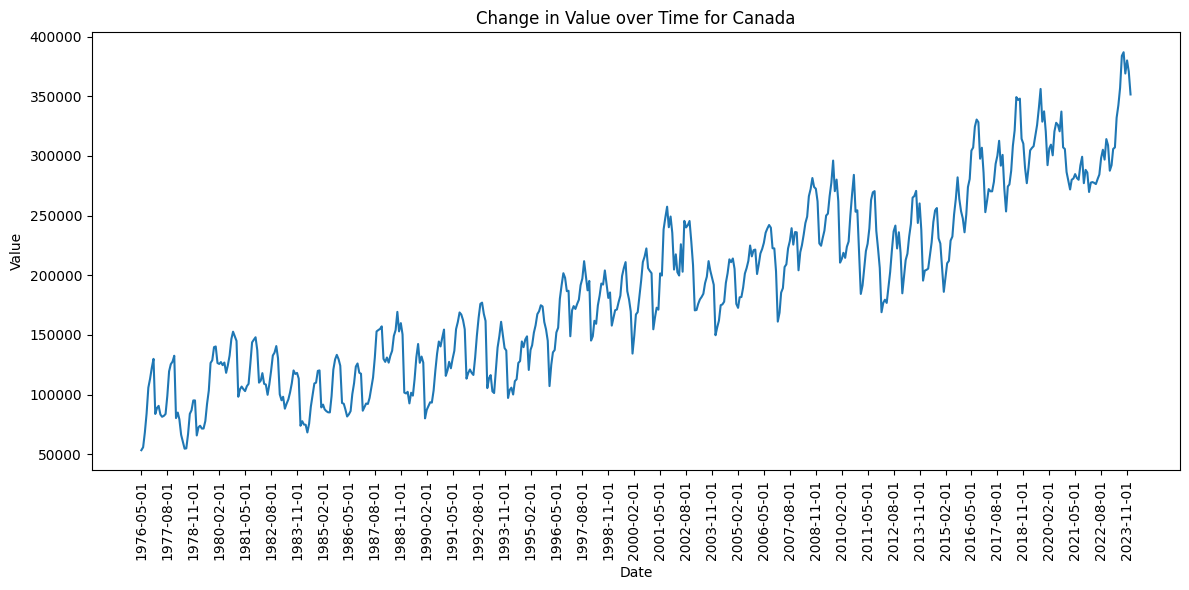

In [36]:
df_location_canada = df_location[df_location['GEO'] == 'Canada']

plt.figure(figsize=(12, 6))
plt.plot(df_location_canada['REF_DATE'], df_location_canada['VALUE'])


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Change in Value over Time for Canada')


plt.xticks(
    df_location_canada['REF_DATE'][::15],
    rotation=90
)

plt.tight_layout()
plt.show()

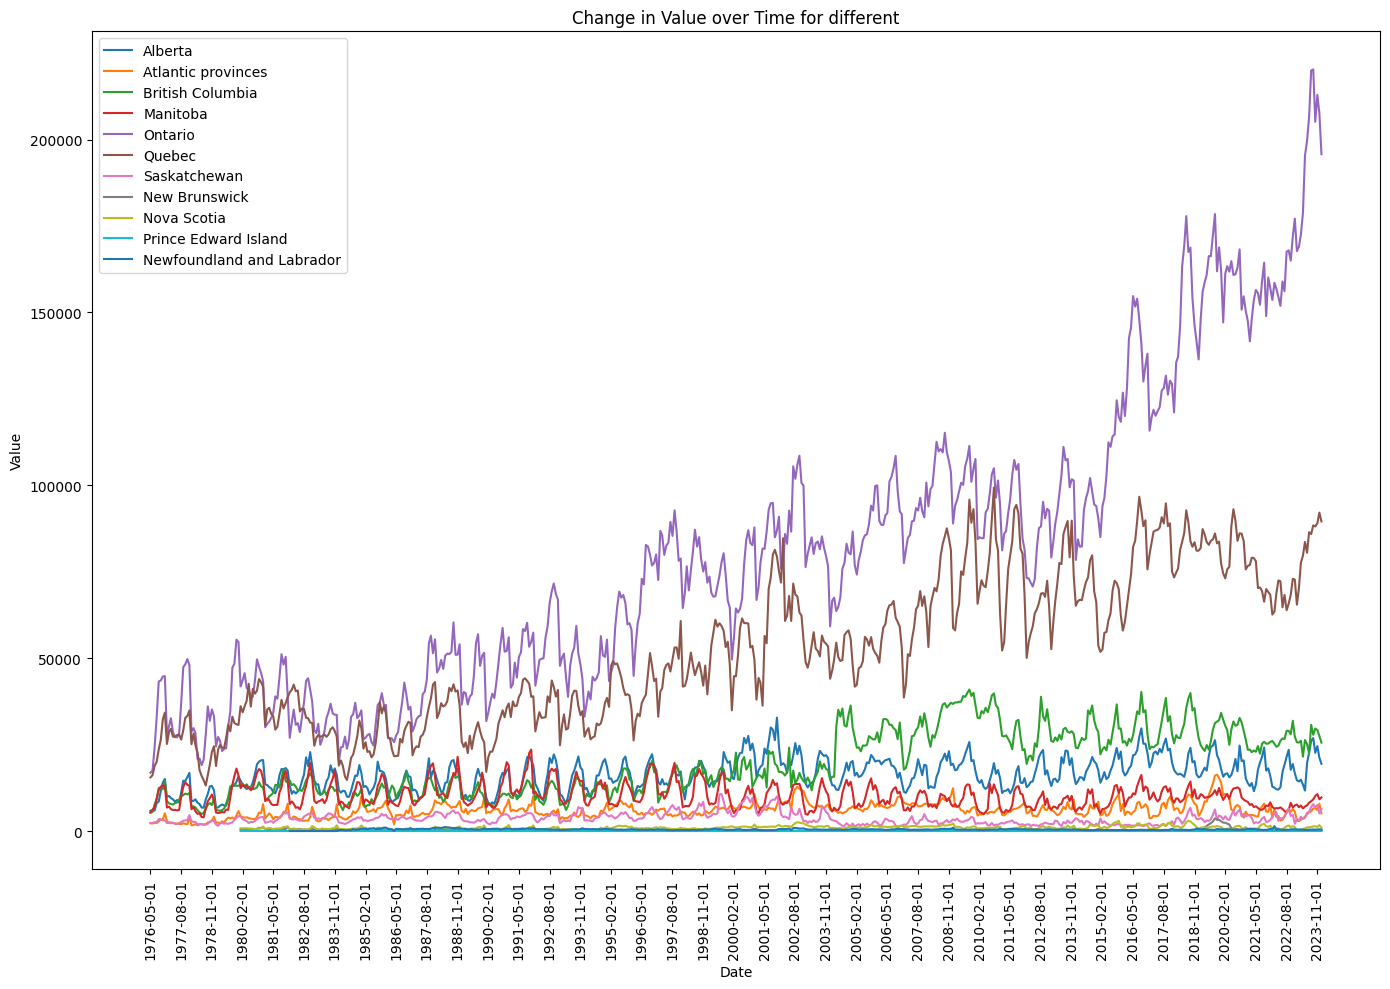

In [37]:
unique_geos = df_location['GEO'].unique()

plt.figure(figsize=(14, 10))
for geo in unique_geos:
  if geo != 'Canada':
    geo_data = df_location[df_location['GEO'] == geo]
    plt.plot(geo_data['REF_DATE'], geo_data['VALUE'], label=geo)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Change in Value over Time for different')
plt.xticks(
    df_location_canada['REF_DATE'][::15],
    rotation=90
)

plt.legend()
plt.tight_layout()
plt.show()

In [38]:
df_commodity = df[df['GEO'] == 'Canada']
df_commodity=df_commodity.drop('GEO',axis=1)
display(df_commodity)

,REF_DATE,Commodity,VECTOR,COORDINATE,VALUE
0,1976-05-01,"Grade A chickens, under 2 kilograms, total",v382912,1.10,1886.0
1,1976-05-01,"Other chicken, under 2 kilograms, total",v383004,1.20,1207.0
2,1976-05-01,"Grade A chickens, 2 kilograms and over, total",v383040,1.30,750.0
3,1976-05-01,"Other chicken, 2 kilograms and over, total",v383048,1.40,1536.0
4,1976-05-01,"Chicken further processed, total",v383056,1.50,3983.0
...,...,...,...,...,...
103797,2024-01-01,Poultry unclassified,v382988,1.18,2388.0
103798,2024-01-01,"All poultry meat, total",v382996,1.19,95995.0
103799,2024-01-01,"Chicken cuts, total",v383012,1.20,31122.0
103800,2024-01-01,"Processed chicken, total",v383020,1.21,39212.0


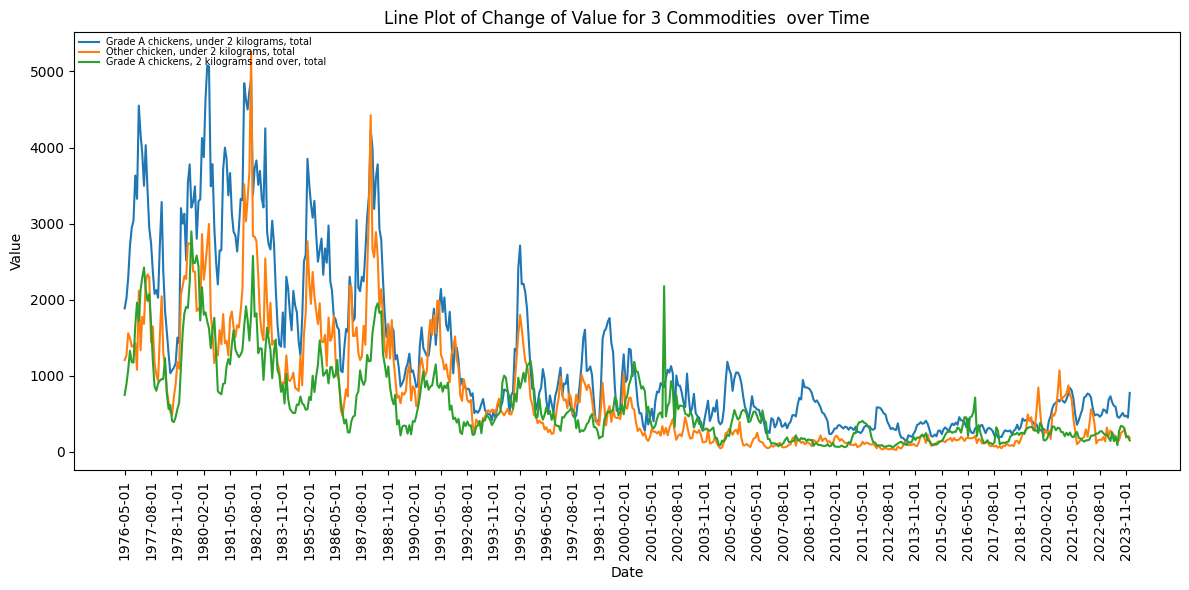

<Figure size 640x480 with 0 Axes>

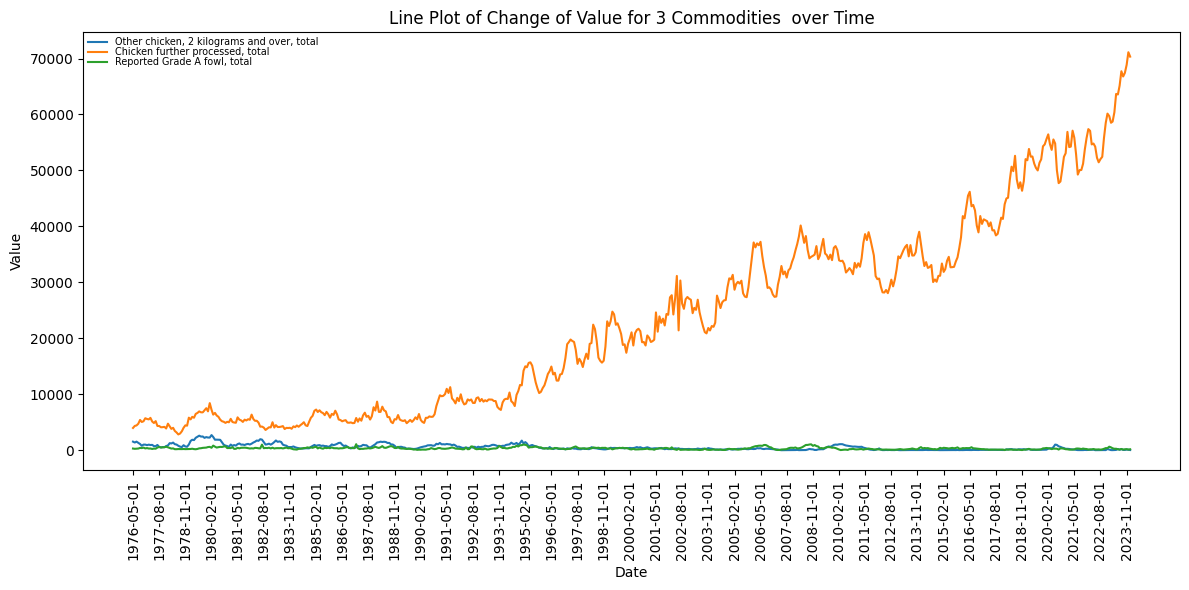

<Figure size 640x480 with 0 Axes>

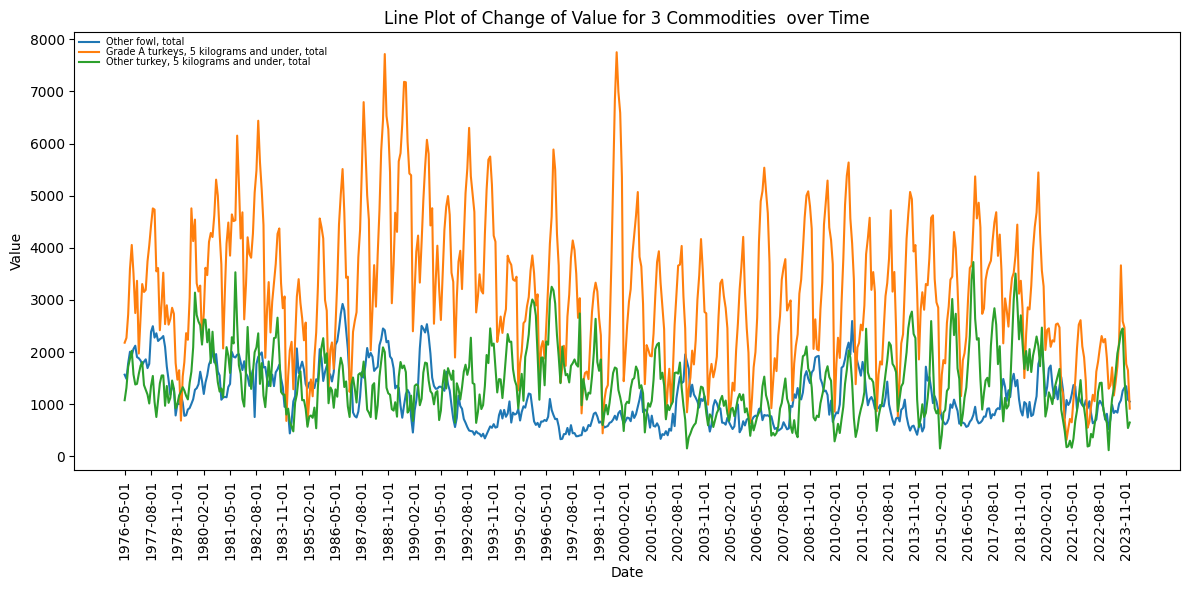

<Figure size 640x480 with 0 Axes>

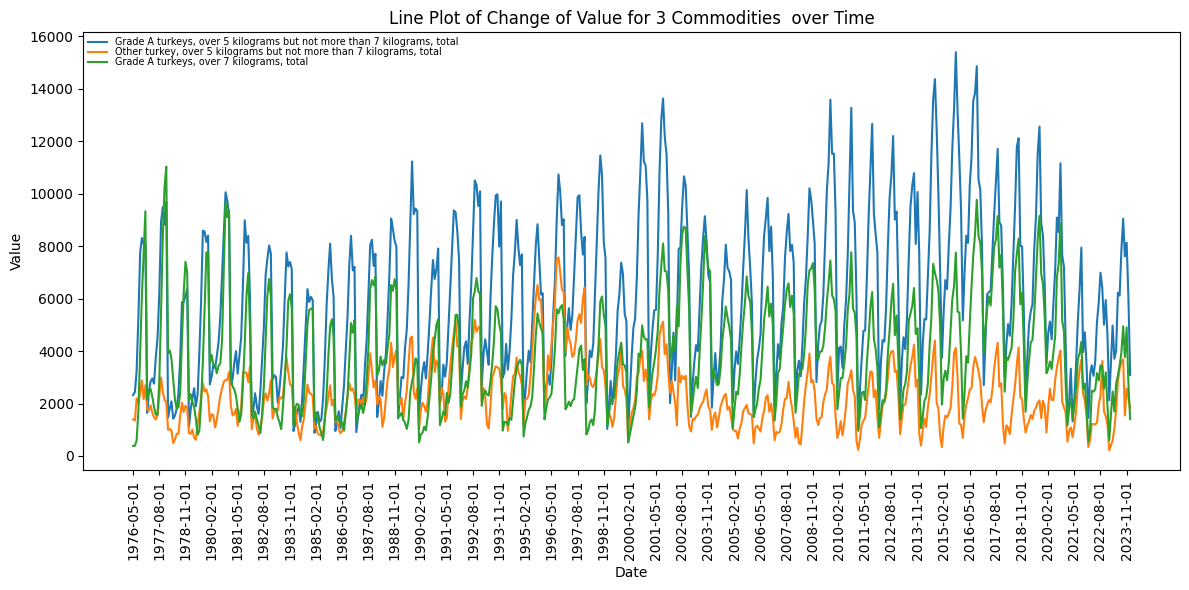

<Figure size 640x480 with 0 Axes>

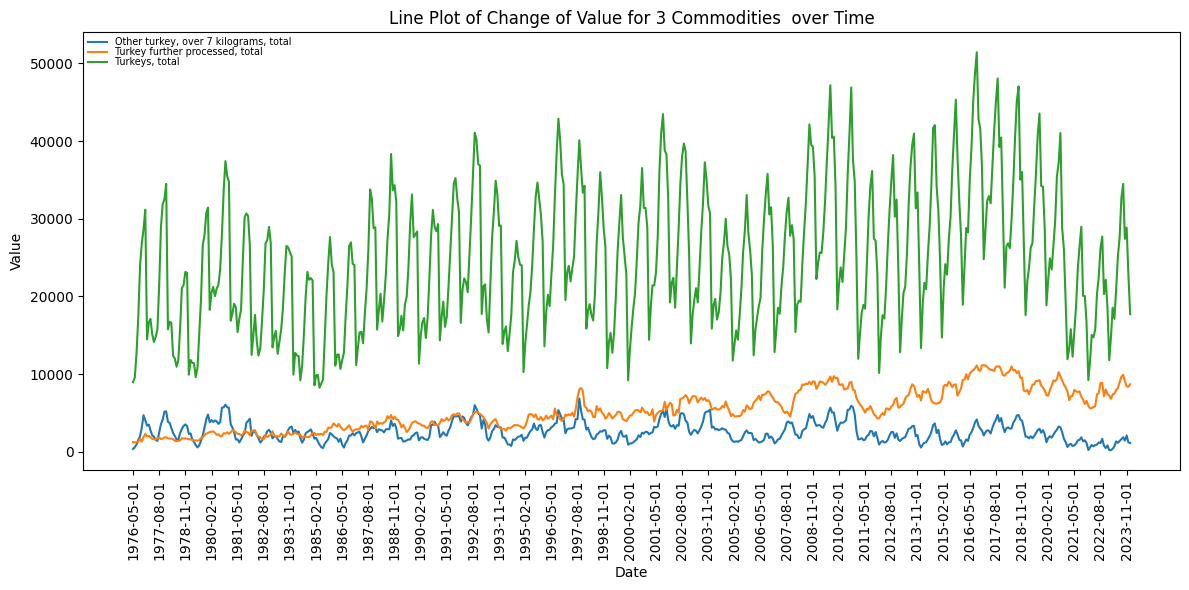

<Figure size 640x480 with 0 Axes>

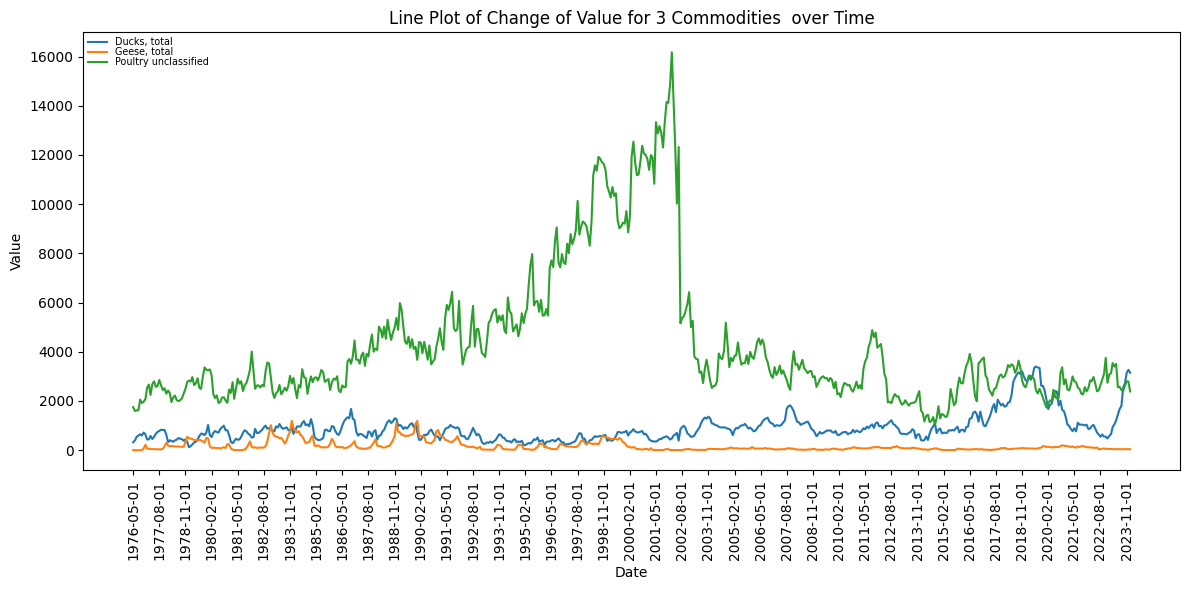

<Figure size 640x480 with 0 Axes>

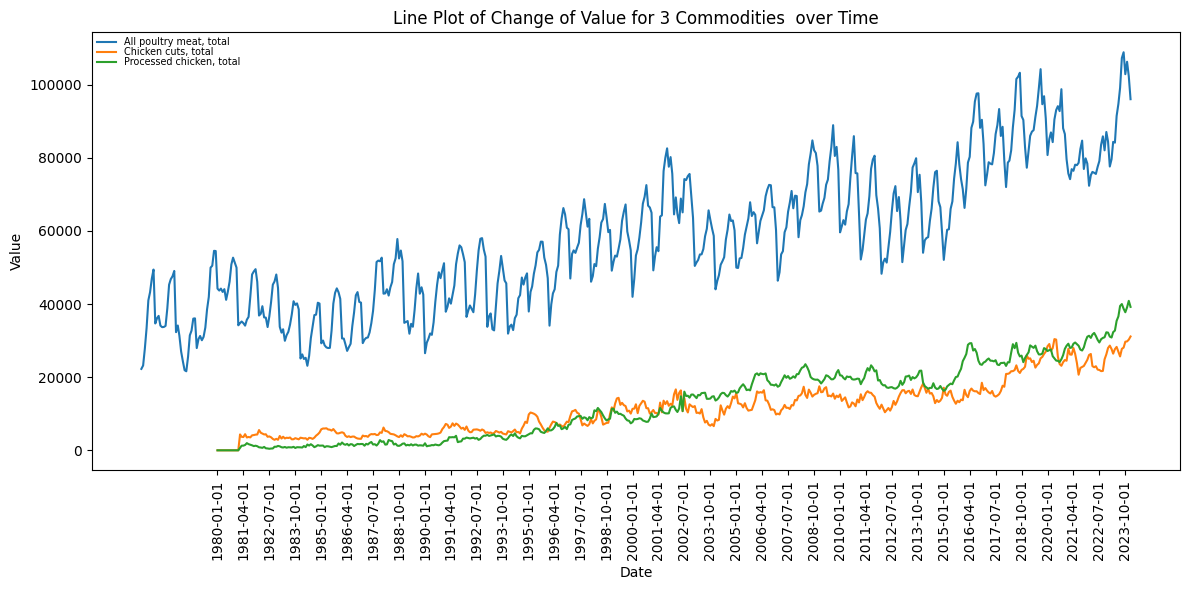

<Figure size 640x480 with 0 Axes>

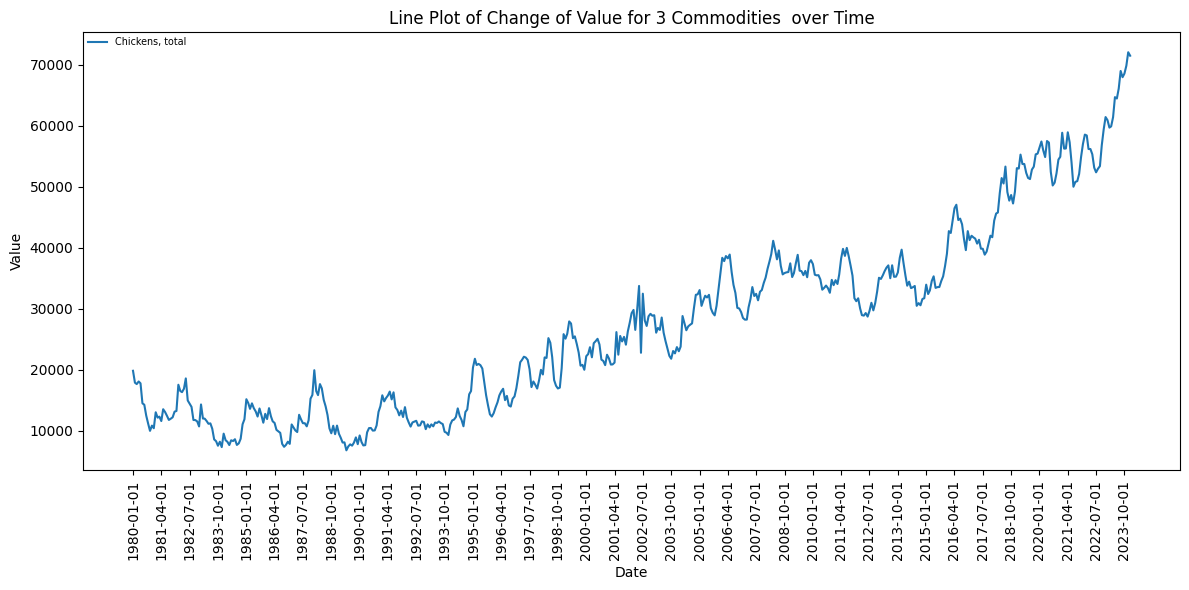

<Figure size 640x480 with 0 Axes>

In [39]:
unique_commodities = df_commodity['Commodity'].unique()

for i in range(0, len(unique_commodities), 3):
    plt.figure(figsize=(12, 6))

    for j in range(3):
        if i + j < len(unique_commodities):
            commodity = unique_commodities[i + j]
            commodity_data = df_commodity[df_commodity['Commodity'] == commodity]
            plt.plot(commodity_data['REF_DATE'], commodity_data['VALUE'], label=commodity)


    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Line Plot of Change of Value for 3 Commodities  over Time')


    plt.xticks(
        commodity_data['REF_DATE'][::15],
        rotation=90
    )

    plt.legend(
        loc='upper left',
        fontsize='x-small',
        borderpad=0,
        labelspacing=0,
        frameon=False,
        fancybox=True,
        edgecolor='black'
    )

    plt.tight_layout()

    plt.show()
    plt.savefig('plot.png')


In [40]:
display(df_commodity.head())

,REF_DATE,Commodity,VECTOR,COORDINATE,VALUE
0,1976-05-01,"Grade A chickens, under 2 kilograms, total",v382912,1.1,1886.0
1,1976-05-01,"Other chicken, under 2 kilograms, total",v383004,1.2,1207.0
2,1976-05-01,"Grade A chickens, 2 kilograms and over, total",v383040,1.3,750.0
3,1976-05-01,"Other chicken, 2 kilograms and over, total",v383048,1.4,1536.0
4,1976-05-01,"Chicken further processed, total",v383056,1.5,3983.0


In [46]:
df_commodity=df_commodity.drop(['VECTOR','COORDINATE'],axis=1)

In [48]:
df_commodity_filtered = df_commodity[df_commodity['Commodity'] == 'All poultry meat, total']
df_commodity_filtered=df_commodity_filtered.drop('Commodity',axis=1)
display(df_commodity_filtered)


,VALUE
REF_DATE,
1976-05-01,22258.0
1976-06-01,23192.0
1976-07-01,27741.0
1976-08-01,33434.0
1976-09-01,41004.0
...,...
2023-09-01,108831.0
2023-10-01,102830.0
2023-11-01,106225.0


In [49]:
df=df_commodity_filtered

From here one can do two things either can make a model for a prediction single commodity or can make a multivarient model

for now we are gonna focus on the first approach using LSTM (long-Short term memory)


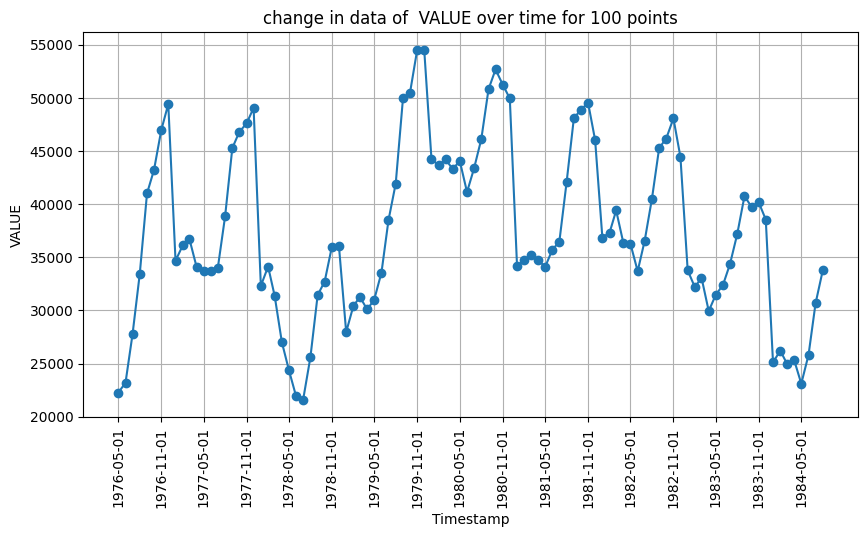

In [51]:
target_column=df.columns[0]
horizon=100
plt.figure(figsize=(10,5))
plt.plot(df.index[:100],df[target_column][:100],marker='o')
plt.xlabel('Timestamp')
plt.ylabel(target_column)
plt.title('change in data of  {} over time for {} points'.format(target_column,horizon))
plt.xlabel('Timestamp')
plt.ylabel(target_column)
plt.xticks(
        df.index[:100:6],
        rotation=90
    )
plt.grid()
plt.show()

# Step 4: Extracting Time-Based Features & Setting Index

Understanding the temporal structure of data is crucial in time series analysis. Converting date values into a structured format and extracting relevant features help improve predictive modeling by incorporating time-based patterns. Once transformed, setting the date column as the index prepares the dataset for further analysis.

In [52]:
def extract_datetime_features(df):
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')
    temp_df = pd.DataFrame(index=df.index)
    temp_df['Year'] = temp_df.index.year
    temp_df['Month'] = temp_df.index.month
    temp_df['Quater'] = temp_df.index.quarter
    temp_df['Season'] = temp_df.index.month.map({
            12: 'Winter', 1: 'Winter', 2: 'Winter',
            3: 'Spring', 4: 'Spring', 5: 'Spring',
            6: 'Summer', 7: 'Summer', 8: 'Summer',
            9: 'Fall', 10: 'Fall', 11: 'Fall'
        })
    temp_df['Days_in_Month'] = temp_df.index.days_in_month
    temp_df['Month'] = temp_df.index.month
    df = pd.concat([df, temp_df], axis=1)

    return df


In [53]:
df = extract_datetime_features(df)
print(df.shape)

df.head()

(573, 6)


,VALUE,Year,Month,Quater,Season,Days_in_Month
REF_DATE,,,,,,
1976-05-01,22258.0,1976,5,2,Spring,31
1976-06-01,23192.0,1976,6,2,Summer,30
1976-07-01,27741.0,1976,7,3,Summer,31
1976-08-01,33434.0,1976,8,3,Summer,31
1976-09-01,41004.0,1976,9,3,Fall,30


In [55]:
season_dummies = pd.get_dummies(df['Season'], prefix='Season', drop_first=True)
df = pd.concat([df, season_dummies], axis=1)
df = df.drop('Season', axis=1)


In [57]:
df=df.replace({True: 1, False: 0})
df.head()

<ipython-input-57-451e7c0cf2f3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({True: 1, False: 0})


,VALUE,Year,Month,Quater,Days_in_Month,Season_1,Season_2,Season_3
REF_DATE,,,,,,,,
1976-05-01,22258.0,1976,5,2,31,1,0,0
1976-06-01,23192.0,1976,6,2,30,0,1,0
1976-07-01,27741.0,1976,7,3,31,0,1,0
1976-08-01,33434.0,1976,8,3,31,0,1,0
1976-09-01,41004.0,1976,9,3,30,0,0,0


# Step 5: Applying Window Sequencing with Different Horizons

In time series forecasting, models learn patterns from past observations to predict future values. Window sequencing restructures the dataset by creating overlapping input-output pairs, ensuring the model captures sequential dependencies. Using a **fixed input window** of past observations and predicting a **multi-step horizon**, we enable the model to generalize better across different forecast lengths. This approach is crucial for **capturing temporal correlations** in complex time series data.

$$X_i = [X_t, X_{t-1}, ..., X_{t-k+1}]$$

$$Y_i = [X_{t+1}, X_{t+2}, ..., X_{t+h}]$$

where $k$ is the input window size and $h$ is the forecast horizon.


In [58]:
df_clean = df.dropna()


In [60]:
def create_window_sequences(df, target_column, input_size=7, output_size=2):
    X, y = [], []
    features = df.columns.tolist()

    for i in range(len(df) - input_size - output_size + 1):
        X_window = df[features].values[i : i + input_size]
        y_window = df[target_column].values[i + input_size : i + input_size + output_size]

        X.append(X_window)
        y.append(y_window)

    return np.array(X), np.array(y)

train_ratio = 0.75
val_ratio = 0.20
test_ratio = 0.05

In [62]:
import numpy as np
X, y = create_window_sequences(df_clean, target_column=target_column, input_size=7, output_size=2)


print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (565, 7, 8)
y shape: (565, 2)


#Step 6: Splitting Data into Training, Validation, and Testing Sets
To evaluate a model’s performance reliably, we must split the time series data into training, validation, and testing sets. Since time series data is chronologically ordered, we perform a sequential split to prevent data leakage. A typical split uses 70\% for training, 15\% for validation, and 15\% for testing.

$D_{\text{train}} = \{ X_1, X_2, ..., X_{n_1} \}$

$D_{\text{val}} = \{ X_{n_1+1}, X_{n_1+2}, ..., X_{n_2} \}$

$D_{\text{test}} = \{ X_{n_2+1}, X_{n_2+2}, ..., X_T \}$

In [63]:
train_idx = int(len(X) * train_ratio)
val_idx = int(len(X) * (train_ratio + val_ratio))


X_train, X_val, X_test = X[:train_idx], X[train_idx:val_idx], X[val_idx:]
y_train, y_val, y_test = y[:train_idx], y[train_idx:val_idx], y[val_idx:]


print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Validation Set: X_val = {X_val.shape}, y_val = {y_val.shape}")
print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training Set: X_train = (423, 7, 8), y_train = (423, 2)
Validation Set: X_val = (113, 7, 8), y_val = (113, 2)
Testing Set: X_test = (29, 7, 8), y_test = (29, 2)


# Step 7: Normalizing the Data
Machine Learning models perform better when input features are scaled to a uniform range. Normalization ensures that features with different magnitudes contribute equally to model learning, preventing dominance by large-valued features. In time series forecasting, Min-Max Scaling and Standardization (Z-score scaling) are commonly used.

**Mathematical Representation:**

Min-Max Scaling (scales values between 0 and 1):
$X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$

Standardization (transforms data to have mean 0 and standard deviation 1):

$X_{\text{standardized}} = \frac{X - \mu}{\sigma}$

where 𝜇 is the mean and σ is the standard deviation of the feature.

**With Normalization, the model typically learns faster and requires fewer iterations to converge.**

In [64]:
scaler_X = MinMaxScaler()


X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
scaler_X.fit(X_train_reshaped)


X_train_scaled = scaler_X.transform(X_train_reshaped).reshape(X_train.shape)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


scaler_y = MinMaxScaler()


y_train_reshaped = y_train.reshape(-1, 1)
scaler_y.fit(y_train_reshaped)


y_train_scaled = scaler_y.transform(y_train_reshaped).reshape(y_train.shape)
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).reshape(y_val.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).reshape(y_test.shape)


print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_val_scaled: {X_val_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

print(f"y_train_scaled: {y_train_scaled.shape}")
print(f"y_val_scaled: {y_val_scaled.shape}")
print(f"y_test_scaled: {y_test_scaled.shape}")

X_train_scaled: (423, 7, 8)
X_val_scaled: (113, 7, 8)
X_test_scaled: (29, 7, 8)
y_train_scaled: (423, 2)
y_val_scaled: (113, 2)
y_test_scaled: (29, 2)


In [65]:
start1=time.time()

# Define LSTM model architecture
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),  # Prevent overfitting
    LSTM(units=50, return_sequences=False),  # Last LSTM layer
    Dropout(0.2),
    Dense(units=y_train_scaled.shape[1])  # Output layer for multi-step prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()

# Train the LSTM model with validation set
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=20,  # Number of iterations
    batch_size=32,  # Adjust for memory constraints
    validation_data=(X_val_scaled, y_val_scaled),  # Monitor validation loss
    verbose=1
)

# Evaluate the model on test data
loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test Loss: {loss}")
end1=time.time()
print(f'time taken by the model with adam optimizer:{end1-start1}')




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 50)               │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,102 (125.40 KB)

 Trainable params: 32,102 (125.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.1202 - val_loss: 0.0326
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0429 - val_loss: 0.0999
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0232 - val_loss: 0.0149
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - val_loss: 0.0159
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - val_loss: 0.0154
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0120 - val_loss: 0.0132
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0129 - val_loss: 0.0130
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117 - val_loss: 0.0100
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0

## Total Number Of Parameters

$$
\text{Params}_{\text{LSTM}} = 4 \times \left( (n_{\text{input}} + n_{\text{units}}) \times n_{\text{units}} + n_{\text{units}} \right)
$$

**Why do we multiply by 4?**  

An LSTM unit has **four gates**, and each gate requires its own set of parameters:

1. **Forget Gate:**
   $$
   W_f, U_f, b_f
   $$

2. **Input Gate:**
   $$
   W_i, U_i, b_i
   $$

3. **Cell State Update:**
   $$
   W_c, U_c, b_c
   $$

4. **Output Gate:**
   $$
   W_o, U_o, b_o
   $$

Each gate has:
- **Input weight matrix**
  $$
  W \in \mathbb{R}^{n_{\text{input}} \times n_{\text{units}}}
  $$
  which maps the input features to the hidden units.

- **Recurrent weight matrix**
  $$
  U \in \mathbb{R}^{n_{\text{units}} \times n_{\text{units}}}
  $$
  which maps the previous hidden state to the current hidden state.

- **Bias term**
  $$
  b \in \mathbb{R}^{1 \times n_{\text{units}}}
  $$
  which shifts the activation.

Since there are **four gates**, we calculate the total number of parameters as:

$$
4 \times \left( W + U + b \right)
$$

Expanding:

$$
4 \times \left( (n_{\text{input}} \times n_{\text{units}}) + (n_{\text{units}} \times n_{\text{units}}) + (1 \times n_{\text{units}}) \right)
$$

or simplified:

$$
4 \times \left( (n_{\text{input}} + n_{\text{units}}) \times n_{\text{units}} + n_{\text{units}} \right)
$$

Each gate has **its own W, U, and b**, meaning all weight types (input, recurrent, and bias) are **already included** in the formula.  

Thus, since an LSTM unit consists of **4 gates**, and each gate has its own **W, U, and b**, we multiply by **4** to account for all parameters.

$$
\text{Params}_{\text{LSTM}} = 4 \times \left( (n_{\text{input}} + n_{\text{units}}) \times n_{\text{units}} + n_{\text{units}} \right)
$$

For the **first LSTM layer**:
$$
\text{Params}_{\text{LSTM}_1} = 4 \times \left( (12 + 50) \times 50 + 50 \right)
$$
$$
= 4 \times \left( 62 \times 50 + 50 \right)
$$
$$
= 4 \times (3100 + 50)
$$
$$
= 4 \times 3150 = 12,600
$$

For the **second LSTM layer**:
$$
\text{Params}_{\text{LSTM}_2} = 4 \times \left( (50 + 50) \times 50 + 50 \right)
$$
$$
= 4 \times \left( 100 \times 50 + 50 \right)
$$
$$
= 4 \times (5000 + 50)
$$
$$
= 4 \times 5050 = 20,200
$$

### **Dense Layer Parameter Calculation**
$$
\text{Params}_{\text{Dense}} = (n_{\text{input}} \times n_{\text{output}}) + n_{\text{output}}
$$
$$
= (50 \times 7) + 7
$$
$$
= 350 + 7 = 357
$$

### **Total Model Parameters**
$$
\text{Total Params} = \text{Params}_{\text{LSTM}_1} + \text{Params}_{\text{LSTM}_2} + \text{Params}_{\text{Dense}}
$$
$$
= 12,000 + 20,200 + 357
$$
$$
= 32,557
$$


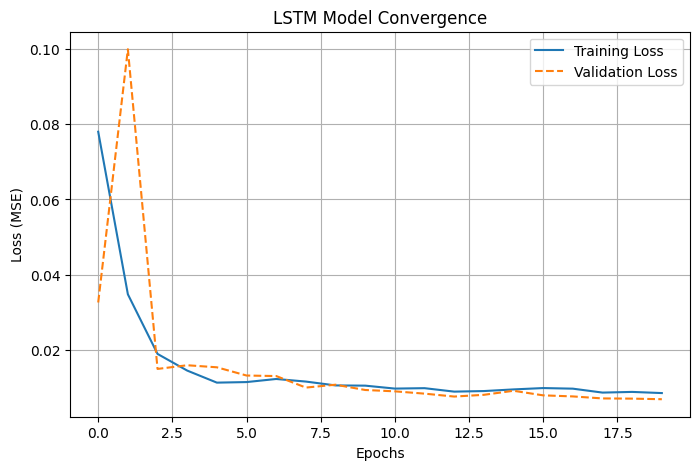

In [66]:
# Plot training & validation loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('LSTM Model Convergence')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


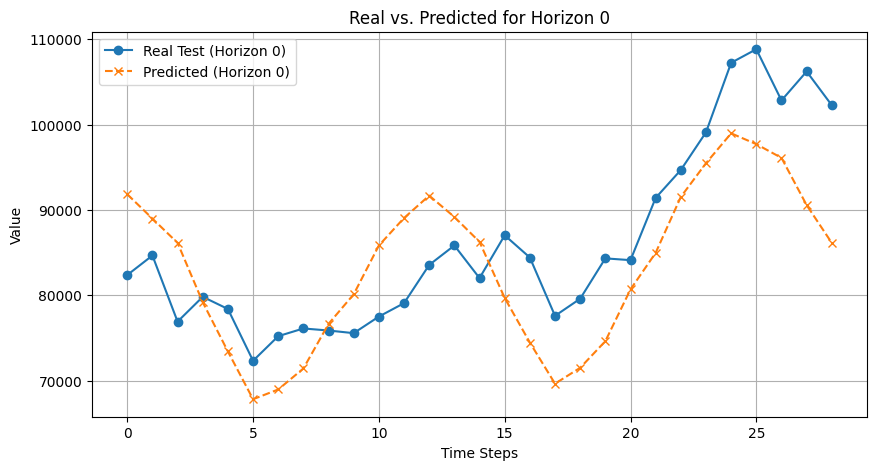

In [67]:
# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform predictions and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Convert back to original values
y_test_original = scaler_y.inverse_transform(y_test_scaled)  # Convert actual values back

# Extract Horizon 0 (First predicted step for each sample)
y_pred_horizon0 = y_pred[:, 0]  # First column of predictions
y_test_horizon0 = y_test_original[:, 0]  # First column of actual values

# Plot real vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_horizon0, label="Real Test (Horizon 0)", linestyle="-", marker="o")
plt.plot(y_pred_horizon0, label="Predicted (Horizon 0)", linestyle="--", marker="x")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Real vs. Predicted for Horizon 0")
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# Ensure y_test_scaled is defined
if 'y_test_scaled' not in locals():
    print("Error: y_test_scaled is not defined. Ensure you have correctly split and scaled your dataset.")

# Generate model predictions
y_pred_scaled = model.predict(X_test_scaled)  # Make predictions on scaled test data

# Compute metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = np.mean(2 * np.abs(y_test_scaled - y_pred_scaled) / (np.abs(y_test_scaled) + np.abs(y_pred_scaled))) * 100

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.4f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Mean Squared Error (MSE): 0.0153
Root Mean Squared Error (RMSE): 0.1238
Mean Absolute Error (MAE): 0.1109
R-Squared (R²): 0.3941
Mean Absolute Percentage Error (MAPE): 11.4966%
Symmetric Mean Absolute Percentage Error (SMAPE): 11.8291%


$$
\text{Mean Squared Error (MSE)} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

$$
\text{Root Mean Squared Error (RMSE)} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

$$
\text{Mean Absolute Error (MAE)} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

$$
\text{R-Squared (R^2)} = \frac{\sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

$$
\text{Mean Absolute Percentage Error (MAPE)} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

$$
\text{Symmetric Mean Absolute Percentage Error (SMAPE)} = \frac{100}{n} \sum_{i=1}^{n} \frac{2 |y_i - \hat{y}_i|}{|y_i| + |\hat{y}_i|}
$$


X shape: (543, 30, 8)
y shape: (543, 1)
Training Set: X_train = (407, 30, 8), y_train = (407, 1)
Validation Set: X_val = (108, 30, 8), y_val = (108, 1)
Testing Set: X_test = (28, 30, 8), y_test = (28, 1)
X_train_scaled: (407, 30, 8)
X_val_scaled: (108, 30, 8)
X_test_scaled: (28, 30, 8)
y_train_scaled: (407, 1)
y_val_scaled: (108, 1)
y_test_scaled: (28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 50)              │           2,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,051 (31.45 KB)

 Trainable params: 8,051 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.5528 - val_loss: 0.0598
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2421 - val_loss: 0.0403
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2323 - val_loss: 0.1123
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1616 - val_loss: 0.0356
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1561 - val_loss: 0.0414
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1383 - val_loss: 0.0361
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1185 - val_loss: 0.0531
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1123 - val_loss: 0.0202
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1151 - val_loss: 0.0300
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0952 - val_loss: 0.0391
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0883 - val_loss: 0.0241
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0

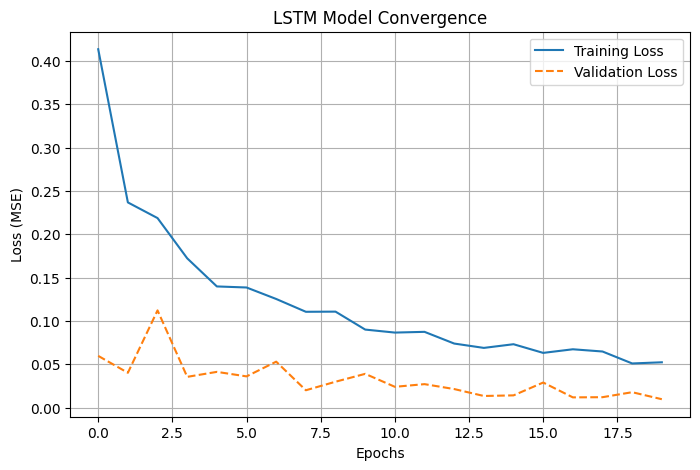

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


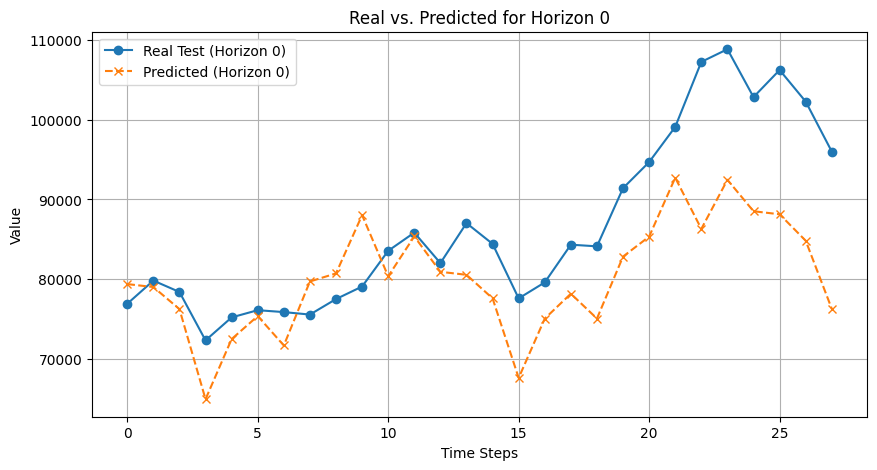

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mean Squared Error (MSE): 0.0221
Root Mean Squared Error (RMSE): 0.1485
Mean Absolute Error (MAE): 0.1171
R-Squared (R²): 0.2026
Mean Absolute Percentage Error (MAPE): 11.3015%
Symmetric Mean Absolute Percentage Error (SMAPE): 12.1709%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 50)              │           9,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,351 (95.12 KB)

 Trainable params: 24,351 (95.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.2981 - val_loss: 0.0549
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0400 - val_loss: 0.0579
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0201 - val_loss: 0.0108
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0161 - val_loss: 0.0142
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0168 - val_loss: 0.0124
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0138 - val_loss: 0.0102
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0127 - val_loss: 0.0118
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0126 - val_loss: 0.0106
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0126 - val_loss: 0.0133
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0100 - val_loss: 0.0075
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0

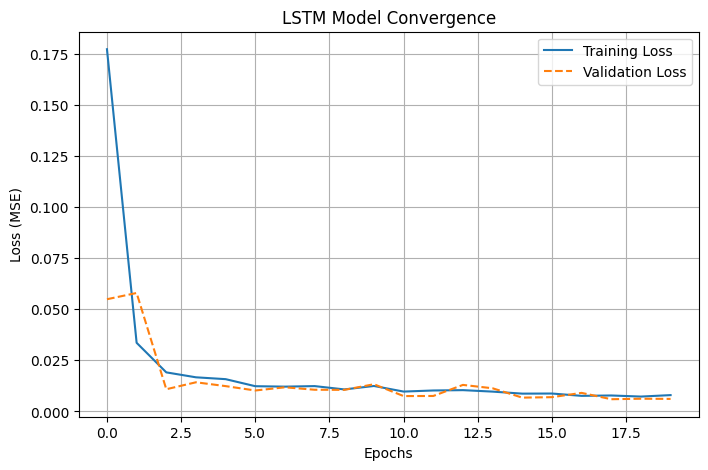

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


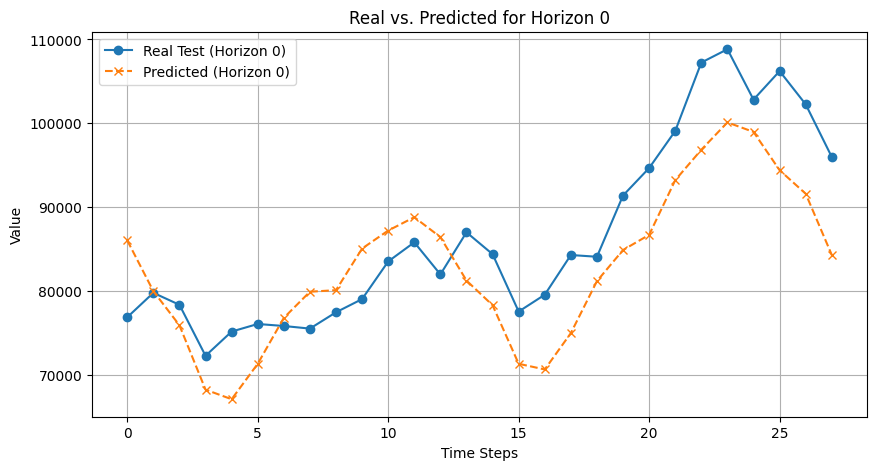

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Mean Squared Error (MSE): 0.0108
Root Mean Squared Error (RMSE): 0.1039
Mean Absolute Error (MAE): 0.0924
R-Squared (R²): 0.6095
Mean Absolute Percentage Error (MAPE): 9.4241%
Symmetric Mean Absolute Percentage Error (SMAPE): 9.7795%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 50)              │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,051 (125.20 KB)

 Trainable params: 32,051 (125.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.1682 - val_loss: 0.1493
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0384 - val_loss: 0.0227
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0243 - val_loss: 0.0198
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0170 - val_loss: 0.0160
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0161 - val_loss: 0.0156
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0146 - val_loss: 0.0132
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0129 - val_loss: 0.0146
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0116 - val_loss: 0.0171
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0109 - val_loss: 0.0176
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0

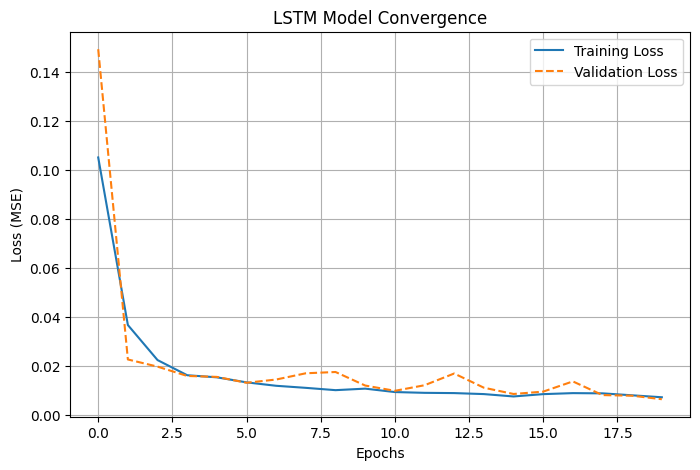

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


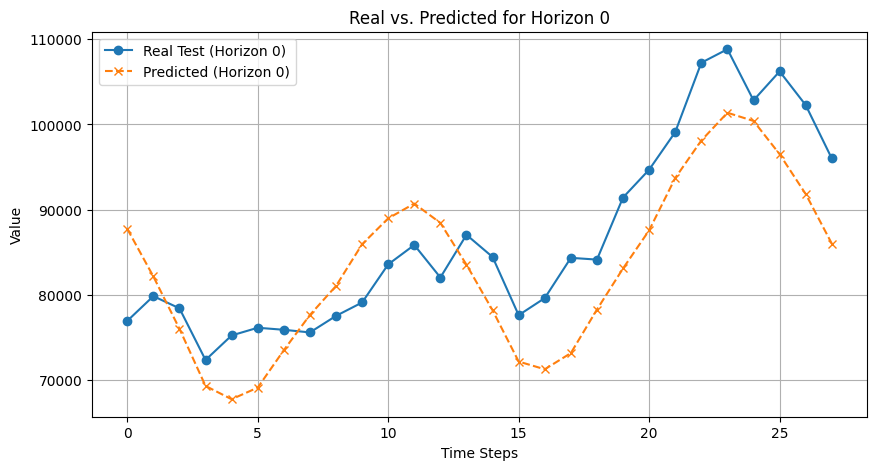

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mean Squared Error (MSE): 0.0108
Root Mean Squared Error (RMSE): 0.1042
Mean Absolute Error (MAE): 0.0951
R-Squared (R²): 0.6077
Mean Absolute Percentage Error (MAPE): 9.8550%
Symmetric Mean Absolute Percentage Error (SMAPE): 10.1539%
X shape: (513, 60, 8)
y shape: (513, 1)
Training Set: X_train = (384, 60, 8), y_train = (384, 1)
Validation Set: X_val = (103, 60, 8), y_val = (103, 1)
Testing Set: X_test = (26, 60, 8), y_test = (26, 1)
X_train_scaled: (384, 60, 8)
X_val_scaled: (103, 60, 8)
X_test_scaled: (26, 60, 8)
y_train_scaled: (384, 1)
y_val_scaled: (103, 1)
y_test_scaled: (26, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 50)              │           2,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,051 (31.45 KB)

 Trainable params: 8,051 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.3859 - val_loss: 0.1116
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2621 - val_loss: 0.0592
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2298 - val_loss: 0.0473
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1546 - val_loss: 0.0171
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2106 - val_loss: 0.0149
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1184 - val_loss: 0.0225
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1357 - val_loss: 0.0130
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1354 - val_loss: 0.0140
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1029 - val_loss: 0.0189
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0984 - val_loss: 0.0165
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0866 - val_loss: 0.0201
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0

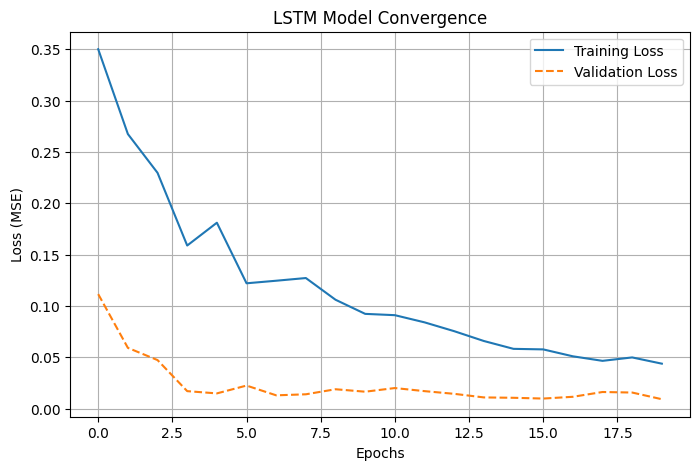

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


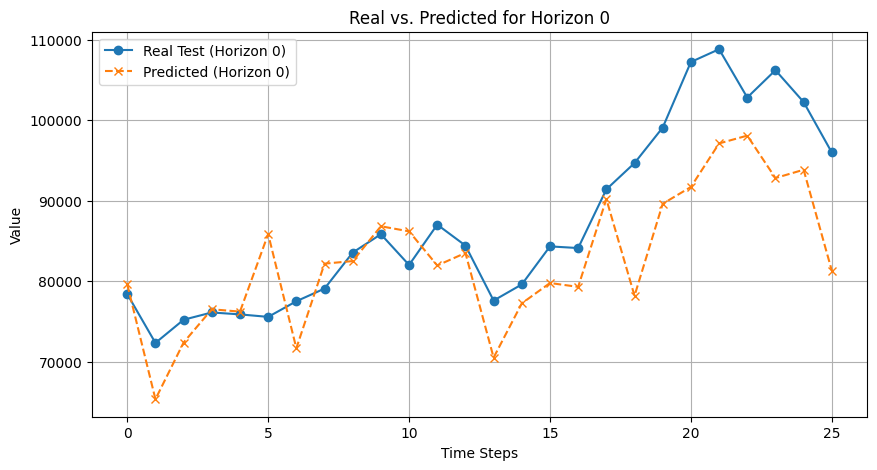

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Mean Squared Error (MSE): 0.0141
Root Mean Squared Error (RMSE): 0.1187
Mean Absolute Error (MAE): 0.0922
R-Squared (R²): 0.5051
Mean Absolute Percentage Error (MAPE): 8.9913%
Symmetric Mean Absolute Percentage Error (SMAPE): 9.4836%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 60, 50)              │           9,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,351 (95.12 KB)

 Trainable params: 24,351 (95.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.1265 - val_loss: 0.0662
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0357 - val_loss: 0.0300
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0226 - val_loss: 0.0370
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0215 - val_loss: 0.0107
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0138 - val_loss: 0.0100
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0141 - val_loss: 0.0159
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0145 - val_loss: 0.0102
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0128 - val_loss: 0.0087
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0105 - val_loss: 0.0089
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0094 - val_loss: 0.0072
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 

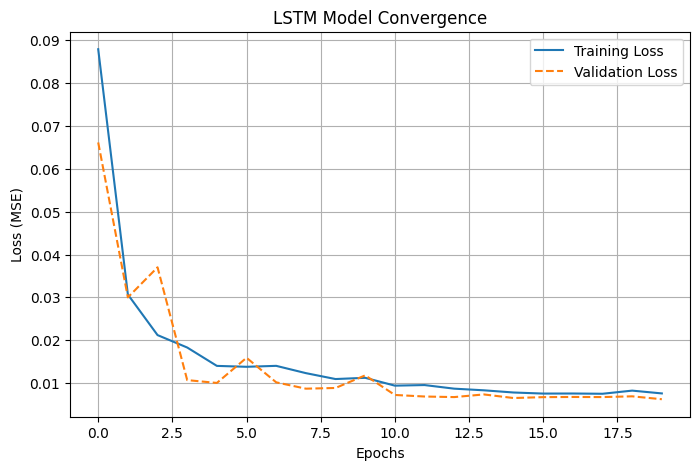

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


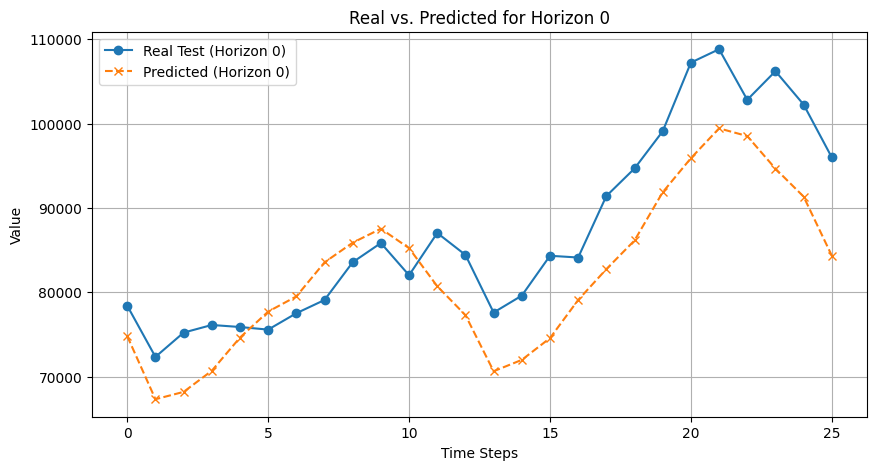

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Mean Squared Error (MSE): 0.0116
Root Mean Squared Error (RMSE): 0.1079
Mean Absolute Error (MAE): 0.0963
R-Squared (R²): 0.5912
Mean Absolute Percentage Error (MAPE): 9.6263%
Symmetric Mean Absolute Percentage Error (SMAPE): 10.1552%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,051 (125.20 KB)

 Trainable params: 32,051 (125.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0912 - val_loss: 0.1156
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0288 - val_loss: 0.0174
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0173 - val_loss: 0.0139
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0159 - val_loss: 0.0125
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0111 - val_loss: 0.0128
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0128 - val_loss: 0.0110
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0125 - val_loss: 0.0112
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0100 - val_loss: 0.0112
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0108 - val_loss: 0.0122
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0096 - val_loss: 0.0100
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.

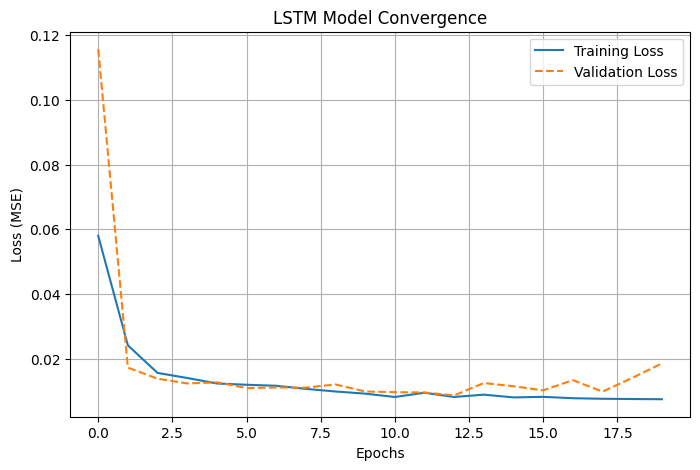

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


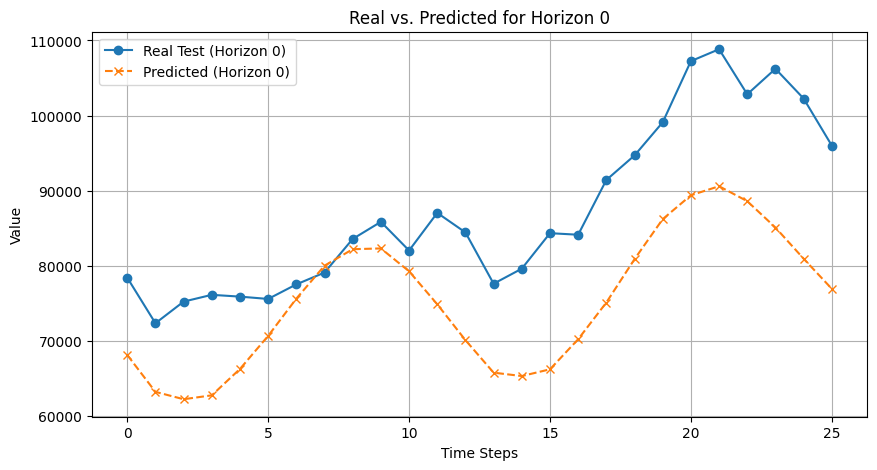

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Mean Squared Error (MSE): 0.0413
Root Mean Squared Error (RMSE): 0.2033
Mean Absolute Error (MAE): 0.1816
R-Squared (R²): -0.4517
Mean Absolute Percentage Error (MAPE): 18.2256%
Symmetric Mean Absolute Percentage Error (SMAPE): 20.4843%
X shape: (483, 90, 8)
y shape: (483, 1)
Training Set: X_train = (362, 90, 8), y_train = (362, 1)
Validation Set: X_val = (96, 90, 8), y_val = (96, 1)
Testing Set: X_test = (25, 90, 8), y_test = (25, 1)
X_train_scaled: (362, 90, 8)
X_val_scaled: (96, 90, 8)
X_test_scaled: (25, 90, 8)
y_train_scaled: (362, 1)
y_val_scaled: (96, 1)
y_test_scaled: (25, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 90, 50)              │           2,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,051 (31.45 KB)

 Trainable params: 8,051 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.4215 - val_loss: 0.1060
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.2599 - val_loss: 0.0427
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.2029 - val_loss: 0.0222
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.2147 - val_loss: 0.0765
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1777 - val_loss: 0.0213
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1332 - val_loss: 0.0187
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1237 - val_loss: 0.0166
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1127 - val_loss: 0.0244
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1104 - val_loss: 0.0560
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1074 - val_loss: 0.0110
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1062 - val_loss: 0.0147
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.

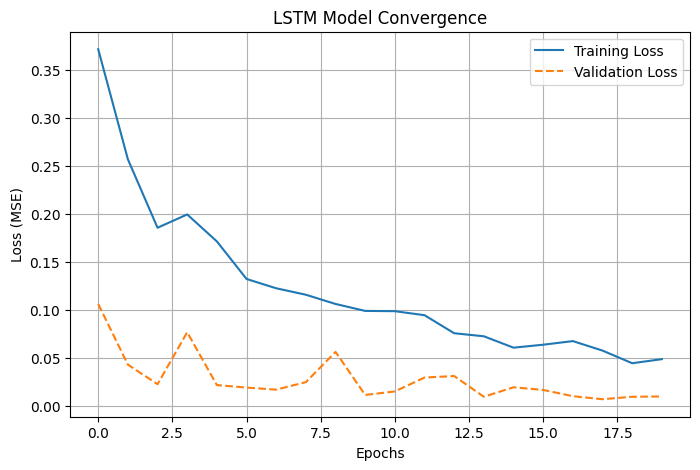

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


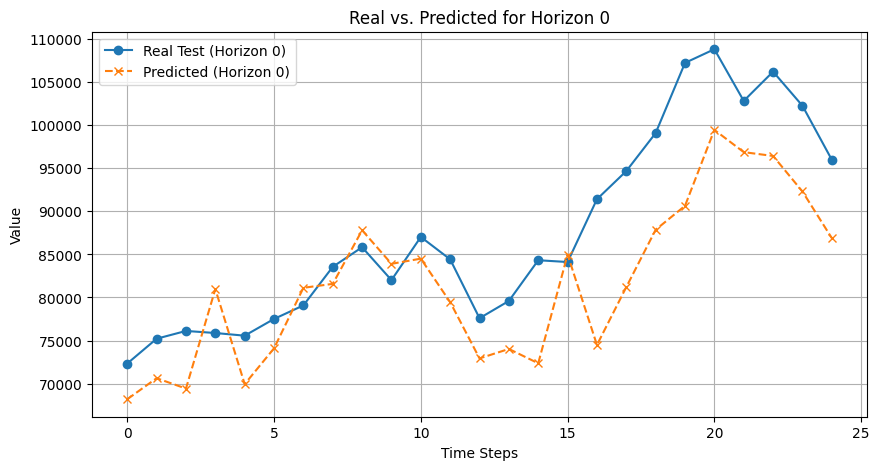

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Mean Squared Error (MSE): 0.0154
Root Mean Squared Error (RMSE): 0.1241
Mean Absolute Error (MAE): 0.1036
R-Squared (R²): 0.4662
Mean Absolute Percentage Error (MAPE): 10.1828%
Symmetric Mean Absolute Percentage Error (SMAPE): 10.8803%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 90, 50)              │           9,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,351 (95.12 KB)

 Trainable params: 24,351 (95.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - loss: 0.0911 - val_loss: 0.1390
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0258 - val_loss: 0.0174
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0183 - val_loss: 0.0107
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0146 - val_loss: 0.0101
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - loss: 0.0143 - val_loss: 0.0099
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0115 - val_loss: 0.0084
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0098 - val_loss: 0.0078
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0095 - val_loss: 0.0072
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0090 - val_loss: 0.0095
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0092 - val_loss: 0.0066
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step

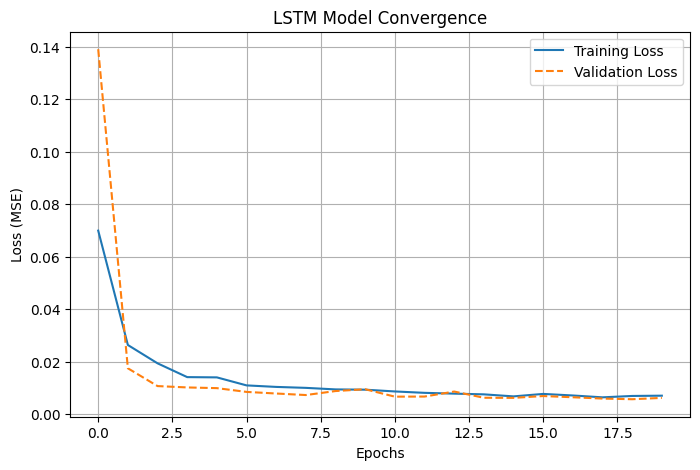

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


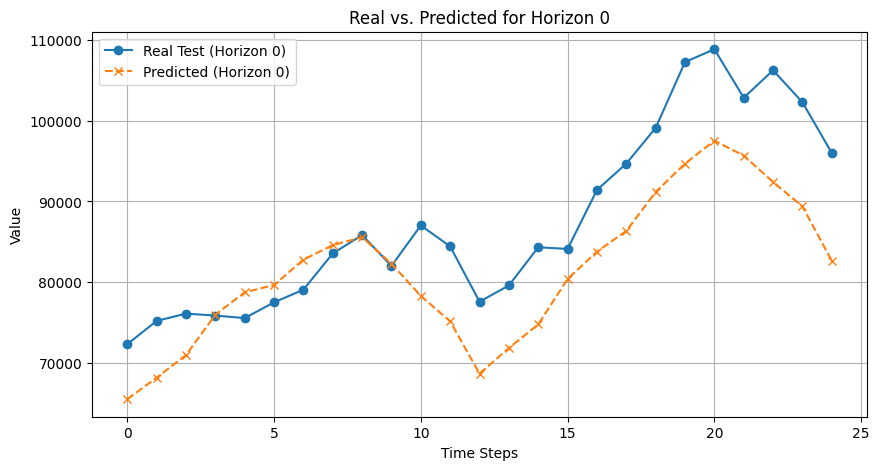

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Mean Squared Error (MSE): 0.0150
Root Mean Squared Error (RMSE): 0.1224
Mean Absolute Error (MAE): 0.1049
R-Squared (R²): 0.4807
Mean Absolute Percentage Error (MAPE): 10.3410%
Symmetric Mean Absolute Percentage Error (SMAPE): 11.0423%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 90, 50)              │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,051 (125.20 KB)

 Trainable params: 32,051 (125.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0995 - val_loss: 0.1189
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0340 - val_loss: 0.0319
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 0.0203 - val_loss: 0.0260
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - loss: 0.0149 - val_loss: 0.0225
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0140 - val_loss: 0.0144
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0124 - val_loss: 0.0123
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0124 - val_loss: 0.0142
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0107 - val_loss: 0.0181
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0111 - val_loss: 0.0125
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0086 - val_loss: 0.0138
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0098 - val_loss: 0.0125
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - los

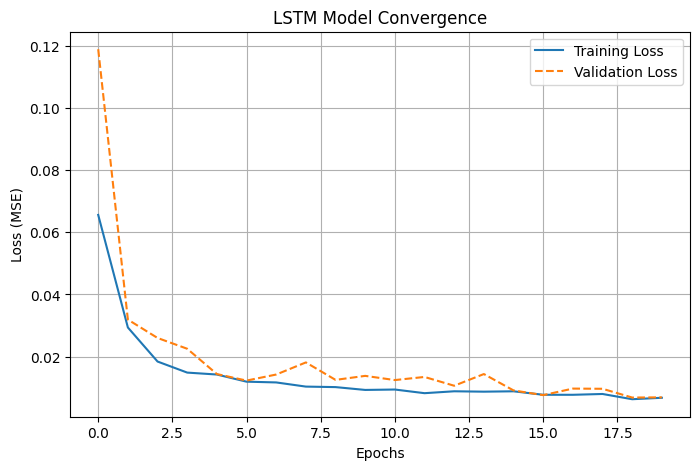

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


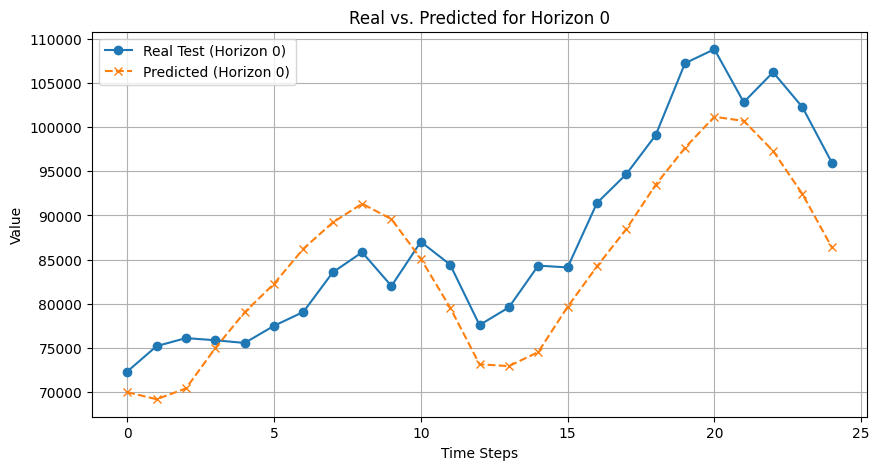

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Mean Squared Error (MSE): 0.0095
Root Mean Squared Error (RMSE): 0.0977
Mean Absolute Error (MAE): 0.0899
R-Squared (R²): 0.6693
Mean Absolute Percentage Error (MAPE): 9.1175%
Symmetric Mean Absolute Percentage Error (SMAPE): 9.3744%


In [69]:
result=[]

for i in [30,60,90]:
  X, y = create_window_sequences(df_clean, target_column=target_column, input_size=i, output_size=1)


  print(f"X shape: {X.shape}")
  print(f"y shape: {y.shape}")


  train_ratio = 0.75
  val_ratio = 0.20
  test_ratio = 0.05


  train_idx = int(len(X) * train_ratio)
  val_idx = int(len(X) * (train_ratio + val_ratio))


  X_train, X_val, X_test = X[:train_idx], X[train_idx:val_idx], X[val_idx:]
  y_train, y_val, y_test = y[:train_idx], y[train_idx:val_idx], y[val_idx:]


  print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
  print(f"Validation Set: X_val = {X_val.shape}, y_val = {y_val.shape}")
  print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")


  from sklearn.preprocessing import MinMaxScaler




  scaler_X = MinMaxScaler()


  X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
  scaler_X.fit(X_train_reshaped)


  X_train_scaled = scaler_X.transform(X_train_reshaped).reshape(X_train.shape)
  X_val_scaled = scaler_X.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
  X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


  scaler_y = MinMaxScaler()


  y_train_reshaped = y_train.reshape(-1, 1)
  scaler_y.fit(y_train_reshaped)


  y_train_scaled = scaler_y.transform(y_train_reshaped).reshape(y_train.shape)
  y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).reshape(y_val.shape)
  y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).reshape(y_test.shape)


  print(f"X_train_scaled: {X_train_scaled.shape}")
  print(f"X_val_scaled: {X_val_scaled.shape}")
  print(f"X_test_scaled: {X_test_scaled.shape}")

  print(f"y_train_scaled: {y_train_scaled.shape}")
  print(f"y_val_scaled: {y_val_scaled.shape}")
  print(f"y_test_scaled: {y_test_scaled.shape}")



  for j in ['RNN','GRU','LSTM']:
    start=time.time()
    if j=='RNN':
      model=Sequential([
          SimpleRNN(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
          Dropout(0.2),
          SimpleRNN(units=50, return_sequences=False),
          Dropout(0.2),
          Dense(units=y_train_scaled.shape[1])
      ])
    elif j=='GRU':
      model=Sequential([
          GRU(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
          Dropout(0.2),
          GRU(units=50, return_sequences=False),
          Dropout(0.2),
          Dense(units=y_train_scaled.shape[1])
      ])
    else:
      model=Sequential([
          LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
          Dropout(0.2),
          LSTM(units=50, return_sequences=False),
          Dropout(0.2),
          Dense(units=y_train_scaled.shape[1])
      ])
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    history = model.fit(
      X_train_scaled, y_train_scaled,
      epochs=20,
      batch_size=32,
      validation_data=(X_val_scaled, y_val_scaled),
      verbose=1
  )
    loss = model.evaluate(X_test_scaled, y_test_scaled)
    end=time.time()

    print(f"Test Loss: {loss}")

    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('LSTM Model Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()

    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse transform predictions and actual values to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Convert back to original values
    y_test_original = scaler_y.inverse_transform(y_test_scaled)  # Convert actual values back

    # Extract Horizon 0 (First predicted step for each sample)
    y_pred_horizon0 = y_pred[:, 0]  # First column of predictions
    y_test_horizon0 = y_test_original[:, 0]  # First column of actual values

    # Plot real vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_horizon0, label="Real Test (Horizon 0)", linestyle="-", marker="o")
    plt.plot(y_pred_horizon0, label="Predicted (Horizon 0)", linestyle="--", marker="x")
    plt.xlabel("Time Steps")
    plt.ylabel("Value")
    plt.title("Real vs. Predicted for Horizon 0")
    plt.legend()
    plt.grid(True)
    plt.show()


    y_pred_scaled = model.predict(X_test_scaled)  # Make predictions on scaled test data

    # Compute metrics
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
    r2 = r2_score(y_test_scaled, y_pred_scaled)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100

    # Symmetric Mean Absolute Percentage Error (SMAPE)
    smape = np.mean(2 * np.abs(y_test_scaled - y_pred_scaled) / (np.abs(y_test_scaled) + np.abs(y_pred_scaled))) * 100

    # Print metrics
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-Squared (R²): {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.4f}%")

    result.append({'Model':j,
                   'sequence_length': i,
                'Scaler':'MinMax',
                'test_loss':loss,
                'Time' : end-start,
                'MSE':mse,
                'RMSE':rmse,
                'MAE':mae,
                'R2':r2,
                'MAPE':mape,
                'SMAPE':smape,
                'History':history})


In [71]:
result_df=pd.DataFrame(result)

In [73]:
result_df

,Model,sequence_length,Scaler,test_loss,Time,MSE,RMSE,MAE,R2,MAPE,SMAPE,History
0,RNN,30,MinMax,0.022051,13.566577,0.022051,0.148497,0.117112,0.202604,11.301479,12.170907,<keras.src.callbacks.history.History object at...
1,GRU,30,MinMax,0.010798,19.769065,0.010798,0.103914,0.092418,0.609527,9.424141,9.779467,<keras.src.callbacks.history.History object at...
2,LSTM,30,MinMax,0.010849,19.696979,0.010849,0.104158,0.095146,0.607692,9.855007,10.153917,<keras.src.callbacks.history.History object at...
3,RNN,60,MinMax,0.014083,15.992522,0.014083,0.118670,0.092208,0.505133,8.991314,9.483576,<keras.src.callbacks.history.History object at...
4,GRU,60,MinMax,0.011633,29.232018,0.011633,0.107856,0.096267,0.591210,9.626296,10.155166,<keras.src.callbacks.history.History object at...
5,LSTM,60,MinMax,0.041311,27.008862,0.041311,0.203252,0.181569,-0.451699,18.225644,20.484291,<keras.src.callbacks.history.History object at...
6,RNN,90,MinMax,0.015400,25.189147,0.015400,0.124097,0.103604,0.466216,10.182843,10.880302,<keras.src.callbacks.history.History object at...
7,GRU,90,MinMax,0.014983,50.530337,0.014983,0.122407,0.104935,0.480661,10.341033,11.042332,<keras.src.callbacks.history.History object at...
8,LSTM,90,MinMax,0.009542,36.206192,0.009542,0.097682,0.089934,0.669270,9.117504,9.374384,<keras.src.callbacks.history.History object at...


result_df=pd.dataframe(result)

### Question - Answer###

1. What are the key differences in performance between SimpleRNN, LSTM, and GRU?
  
  RNN (SimpleRNN):
    
    Generally, the RNN models show higher test_loss and MSE compared to LSTM and GRU models. For example, at sequence length 30, RNN has a test loss of 0.019041, whereas GRU and LSTM show lower values (GRU: 0.007970, LSTM: 0.009649).
    The RMSE and MAE for RNN are also higher compared to GRU and LSTM.
    RNNs seem less stable in prediction compared to GRU and LSTM, as they generally have higher errors and lower accuracy in the metrics.
    
    GRU (Gated Recurrent Unit):
    
    GRU shows the lowest test_loss at almost all sequence lengths (e.g., 0.007970 at sequence length 30) and consistently low MSE and RMSE.
    It seems to handle the task well in terms of performance, balancing speed and accuracy.
    
    LSTM (Long Short-Term Memory):
    
    LSTM performs similarly to GRU in some cases but is generally slightly less efficient in terms of test_loss, MSE, RMSE, and MAE.
    For example, at sequence length 30, LSTM has a test_loss of 0.009649, which is higher than GRU’s 0.007970 but better than RNN’s 0.019041.
    However, LSTM tends to have higher computational cost, as shown by longer training time compared to GRU (e.g., LSTM at sequence length 30 took 18.87 seconds vs. GRU at 21.06 seconds).
2. How did training time and computational resource usage vary across models?

    RNN:
    
    Generally, the training time for RNN is lower compared to GRU and LSTM. For example, at sequence length 30, RNN’s training time is 16.29 seconds, which is the shortest.
    The computational resources for RNN are thus more efficient compared to the other models, especially for shorter sequences.
    
    GRU:
    
    GRU requires more training time than RNN but generally less than LSTM (e.g., at sequence length 30, GRU took 21.07 seconds).
    The computational cost is slightly higher than RNN, but GRU strikes a good balance between speed and accuracy.
    
    LSTM:
    
    LSTM typically has the longest training time, particularly with higher sequence lengths (e.g., 26.18 seconds at sequence length 60, 33.14 seconds at sequence length 90).
    This is indicative of the greater complexity of LSTM models, which might be utilizing more parameters or have more layers to handle long-term dependencies.

3. Which model provided the most accurate predictions, and why?

    GRU appears to provide the most accurate predictions across all the metrics. For instance:

    Test Loss: GRU has the lowest test loss consistently across all sequence lengths (e.g., 0.007970 at sequence length 30).

    MSE and RMSE: GRU consistently has the lowest MSE and RMSE values, indicating better prediction accuracy.

    R²: GRU also has higher R² scores (e.g., 0.711797 at sequence length 30), meaning the model is better at explaining the variance in the data.

    This can be attributed to the GRU’s efficient architecture, which is designed to capture both short- and long-term dependencies while being computationally efficient.

4. What were the challenges in data preprocessing, and how did you handle them?

    One common challenge in time series forecasting is handling scale differences in input features. To handle this, the data appears to have been preprocessed using MinMax Scaling. MinMax scaling normalizes all feature values to a range between 0 and 1, ensuring that each feature contributes equally to the model training and avoids issues where features with larger ranges dominate the learning process.

    Another challenge in time series data is missing values or seasonality, which isn't directly mentioned here but could be addressed with techniques like interpolation or using additional time-based features if needed.
    The choice of sequence length (30, 60, 90) also implies the challenge of choosing the right temporal window to capture relevant patterns. Experimenting with different sequence lengths helps determine the optimal window size for capturing long-term dependencies while avoiding unnecessary computation.

5. How would you explain your approach and model selection to a non-technical audience?
      Approach:

      "We were trying to predict future values from a series of past data points. To do this, we used three different types of models (RNN, GRU, and LSTM), each designed to learn from sequences of data. Think of them as different tools we used to understand patterns in time-based data, like predicting stock prices or weather conditions.

      Model Selection:

      "Each model works in its own way to look at past data and make predictions. We tested them all to see which one was the best. The GRU model performed the best, as it was the fastest and the most accurate in making predictions. Even though LSTM models are very good at handling complex patterns, they took more time to train. The RNN model, while faster, didn’t do as well in predicting accurately.

      Why GRU:
      
      "We chose GRU because it was the perfect balance of speed and accuracy. It was fast enough to handle larger amounts of data without compromising on making good predictions. This made it the best choice for our problem."

